# Cumulative Gain and Loss from the Snow depth timeseries of treatment plots from WY2023
Using the pickle files import from **3_create_tidy_pickle.ipynb**

env: running with **raster** right now since I do not need rioxarray

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns 

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime
import datetime as datetime

import csv 
import copy 
import os.path 

from mpl_toolkits.axes_grid1 import make_axes_locatable

import pickle

Open the cleaned pickle files

In [2]:
# forest and gap sites 
CNF21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNF21.pkl", "rb"))
CNG21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNG21.pkl", "rb"))
CSF21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSF21.pkl", "rb"))
CSG21 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSG21.pkl", "rb"))

CNF23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNF23.pkl", "rb"))
CNG23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CNG23.pkl", "rb"))
CSF23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSF23.pkl", "rb"))
CSG23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CSG23.pkl", "rb"))

# the other post treatment sites 
CN20 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN20.pkl", "rb"))
CN50 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN50.pkl", "rb"))
CN60 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN60.pkl", "rb"))
CN70 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CN70.pkl", "rb"))

CS20  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS20.pkl", "rb"))
CS50  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS50.pkl", "rb"))
CS60  = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS60.pkl", "rb"))
CS120 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\CS120.pkl", "rb"))

In [3]:
# now the SDD files too
SDD_CN23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CN23.pkl", "rb"))
SDD_CS23 = pickle.load(open("C:\\Users\\Lumbr\\OneDrive - UW\\Documents\\Washington\\EasternCascades\\Python\\CER_Timeseries_Analysis\\Pickle\\SDD_CS23.pkl", "rb"))

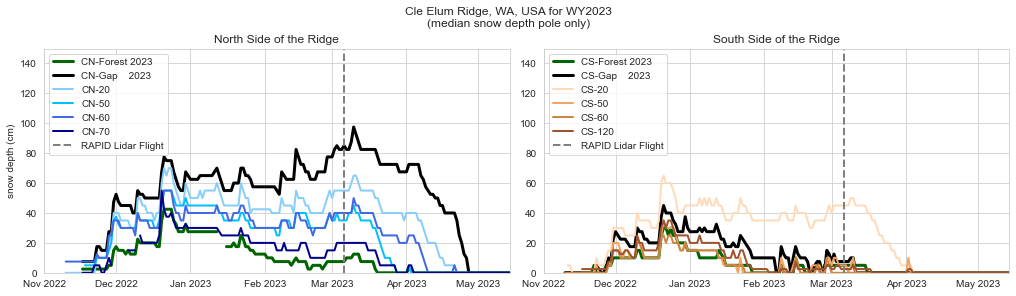

In [4]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2,figsize = (14,4), sharey=False, sharex=True, constrained_layout=True)

alpha=0.2
colorf1 = "darkgreen"
# colorg1 = "darkblue"
colorg1 = "black"

# colorf2 = "limegreen"
# colorg2 = "lightskyblue"

# fill between min and max if we want 
# ax[0].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colorg1, alpha = alpha)
# ax[1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorf1, alpha = alpha)
# ax[1].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorg1, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[0].plot(CNF23['Date'], CNF23['Median_depth'], color = colorf1, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colorg1, label="CN-Gap    2023", linewidth=3)
ax[1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorf1, label="CS-Forest 2023", linewidth=3)
ax[1].plot(CSG23['Date'], CSG23['Median_depth'], color = colorg1, label="CS-Gap    2023", linewidth=3)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = 'lightskyblue', label="CN-20", linewidth=2)
ax[0].plot(CN50['Date'], CN50['Median_depth'], color = 'deepskyblue', label="CN-50"  , linewidth=2)
ax[0].plot(CN60['Date'], CN60['Median_depth'], color = 'royalblue', label="CN-60"  , linewidth=2)
ax[0].plot(CN70['Date'], CN70['Median_depth'], color = 'darkblue', label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = 'peachpuff', label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = 'sandybrown', label="CS-50",  linewidth=2)
ax[1].plot(CS60['Date'], CS60['Median_depth'], color = 'peru', label="CS-60",  linewidth=2)
ax[1].plot(CS120['Date'], CS120['Median_depth'], color = 'sienna', label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="RAPID Lidar Flight", linewidth=2)


# set plotting constants
ax[0].set_ylim(0,150)
ax[1].set_ylim(0,150)

ax[0].set_xlim([datetime.date(2020, 11, 1), datetime.date(2021, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)")
# ax[1].set_ylabel("snow depth (cm)")

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\n(median snow depth pole only)")

ax[0].set_title("North Side of the Ridge")
ax[1].set_title("South Side of the Ridge")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

Plot the fill between for all the sites too

Plot the same BAFs on the north and south together to compare 

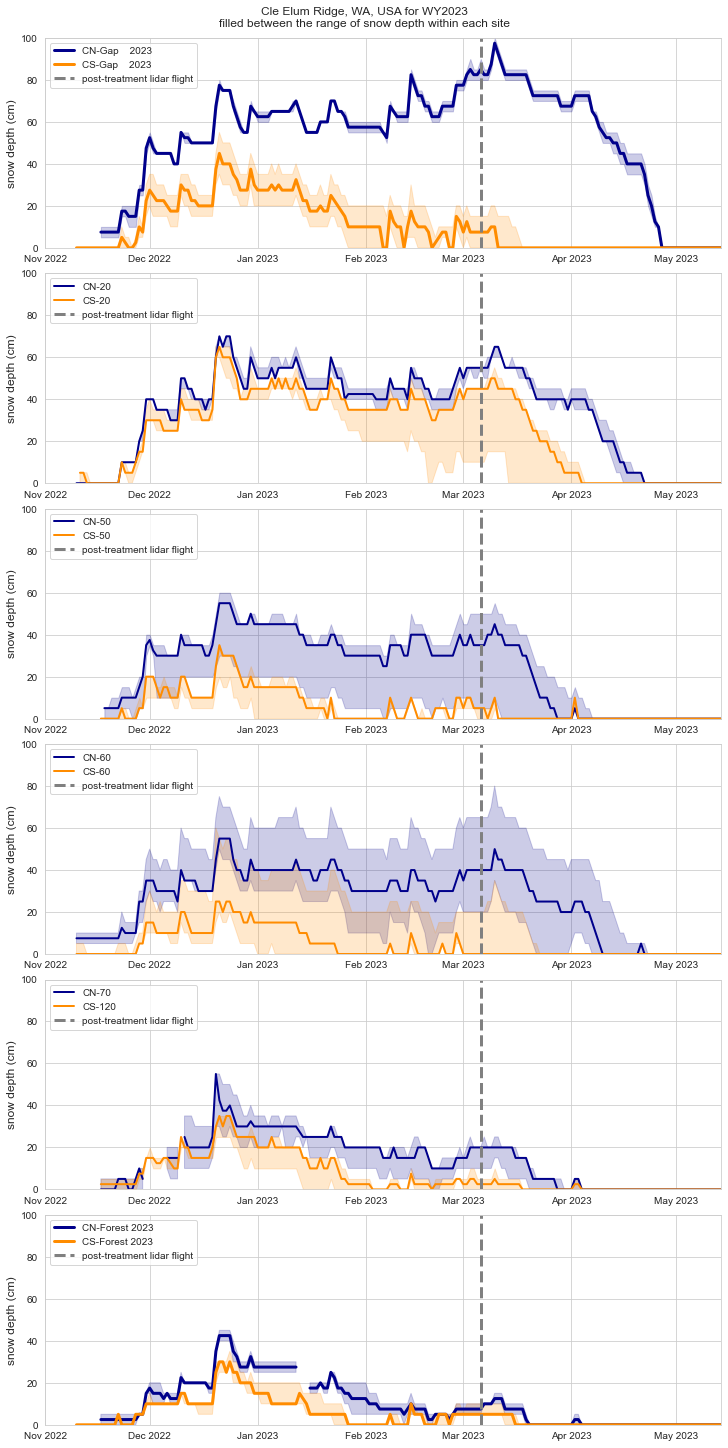

In [5]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(6,1,figsize = (10,20), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# CONTROL SITES
# fill between min and max if we want 
ax[5].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[5].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[0].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)

# then just plot the median for the forest and gap sites
ax[5].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest 2023", linewidth=3)
ax[0].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap    2023", linewidth=3)
ax[5].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest 2023", linewidth=3)
ax[0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap    2023", linewidth=3)

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[1].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[4].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[1].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[4].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[1].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[2].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[3].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[4].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[1].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[2].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[3].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[4].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[4].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[5].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[4].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])
ax[5].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[4].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[5].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[1].set_ylabel("snow depth (cm)", fontsize=12)
ax[2].set_ylabel("snow depth (cm)", fontsize=12)
ax[3].set_ylabel("snow depth (cm)", fontsize=12)
ax[4].set_ylabel("snow depth (cm)", fontsize=12)
ax[5].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')
ax[4].legend(loc='upper left')
ax[5].legend(loc='upper left')

plt.show()

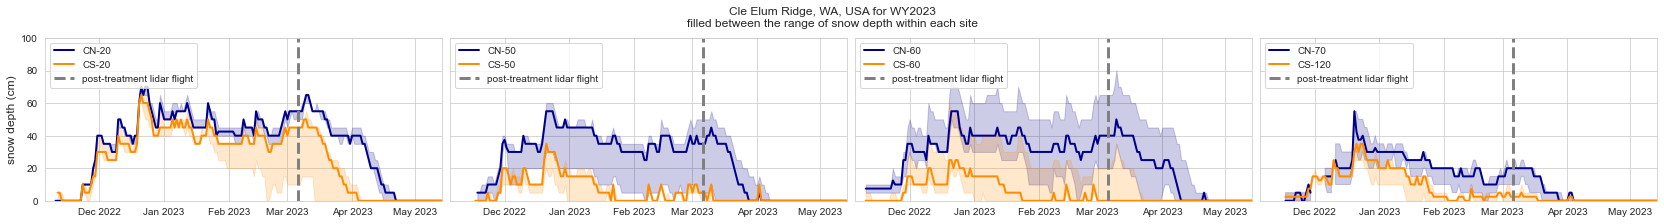

In [6]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,4,figsize = (23,3), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[0].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[1].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[2].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[3].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[0].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[1].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[2].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[3].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[0].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[1].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[2].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[3].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[0].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[1].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[2].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[3].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)
ax[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=3)


# set plotting constants
ax[0].set_ylim(0,100)

ax[0].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[1].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[2].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[3].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])

ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0].set_ylabel("snow depth (cm)", fontsize=12)
# ax[1].set_ylabel("snow depth (cm)", fontsize=12)
# ax[2].set_ylabel("snow depth (cm)", fontsize=12)
# ax[3].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[2].legend(loc='upper left')
ax[3].legend(loc='upper left')

plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_14952\3129241684.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(smn, cax = caxn, label = "")
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_14952\3129241684.py:57: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')


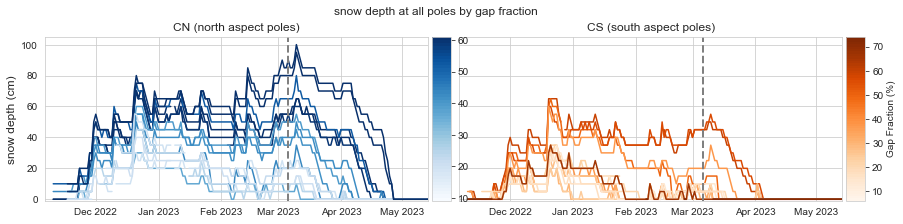

In [7]:
fig, ax = plt.subplots(1,2, figsize = (12,3), sharex=True, sharey=True, constrained_layout=True)

plt.suptitle("snow depth at all poles by gap fraction")

# NORTH _________________________________________________________________________________________________________________________
#The following code sets up the colorbar
dividern = make_axes_locatable(ax[0])
caxn = dividern.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CN23['SiteOpennessAdjusted'].max())-int(SDD_CN23['SiteOpennessAdjusted'].min())
cmapn = plt.get_cmap('Blues', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CN23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CN23['SiteOpennessAdjusted'].max()))
smn = plt.cm.ScalarMappable(cmap=cmapn, norm=norm)
smn.set_array([])
# plt.colorbar(smn, cax = caxn, label = "gap fraction (%)")
plt.colorbar(smn, cax = caxn, label = "")

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[0].plot(CN20['Date'], CN20['Pole1'], label = "CN-20-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole2'], label = "CN-20-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole3'], label = "CN-20-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN50['Date'], CN50['Pole1'], label = "CN-50-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole2'], label = "CN-50-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole3'], label = "CN-50-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN60['Date'], CN60['Pole1'], label = "CN-60-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole2'], label = "CN-60-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole3'], label = "CN-60-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN70['Date'], CN70['Pole1'], label = "CN-70-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole2'], label = "CN-70-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole3'], label = "CN-70-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNF23['Date'], CNF23['Pole1'], label = "CN-F-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole2'], label = "CN-F-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole3'], label = "CN-F-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNG23['Date'], CNG23['Pole1'], label = "CN-G-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole2'], label = "CN-G-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole3'], label = "CN-G-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole3",'SiteOpennessAdjusted'])))

ax[0].set_ylim(-1,105)
ax[0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[0].set_title("CN (north aspect poles)")

# SOUTH _________________________________________________________________________________________________   
#The following code sets up the colorbar
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CS23['SiteOpennessAdjusted'].max())-int(SDD_CS23['SiteOpennessAdjusted'].min())
cmap = plt.get_cmap('Oranges', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CS23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CS23['SiteOpennessAdjusted'].max()))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[1].plot(CS20['Date'], CS20['Pole1'], label = "CS-20-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole2'], label = "CS-20-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole3'], label = "CS-20-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS50['Date'], CS50['Pole1'], label = "CS-50-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole2'], label = "CS-50-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole3'], label = "CS-50-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS60['Date'], CS60['Pole1'], label = "CS-60-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole2'], label = "CS-60-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole3'], label = "CS-60-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS120['Date'], CS120['Pole1'], label = "CS-120-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole2'], label = "CS-120-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole3'], label = "CS-120-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSF23['Date'], CSF23['Pole1'], label = "CS-F-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole2'], label = "CS-F-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole3'], label = "CS-F-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSG23['Date'], CSG23['Pole1'], label = "CS-G-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSG23['Date'], CSG23['Pole2'], label = "CS-G-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])))
#ax[1].plot(CSG23['Date'], CSG23['Pole3'], label = "CS-G-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3",'SiteOpennessAdjusted'])))
# there is no site openness value for the above pole and therefore it is excluded from the plot

ax[1].set_ylim(-1,105)
ax[1].set_xlim([datetime.date(2022, 11, 6), datetime.date(2023, 5, 14)])
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
# ax[1].set_ylabel("snow depth (cm), fontsize=12")
ax[1].set_title("CS (south aspect poles)")

# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)

# ax[0].legend(loc='upper left')
# ax[1].legend(loc='upper left')

# ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

# Cumulative Gain and Loss 

Previous function from Steven, working off of this.

In [5]:
## Previous code from Steven
# def cumulative_gain_loss(x, y):
    
#     # calculate the difference in y values between each time step x
#     delta_y = np.diff(y)
    
#     # calculate the cumulative sum for all delta_y where the change was positive
#     gains = np.cumsum(delta_y[delta_y > 0])
#     # get the time steps (x coordinates) when those positive changes happened
#     x_gains = x[1:][delta_y > 0]
    
#     # calculate the cumulative sum for all delta_y where the change was negative
#     losses = np.cumsum(delta_y[delta_y < 0])
#     # get the time steps (x coordinates) when those negative changes happened
#     x_losses = x[1:][delta_y < 0]
    
#     return (x_gains, gains), (x_losses, losses)

First, make all the matching north and south datasets into tidy pandas dataframes.

In [6]:
# create a new dataframe for each BAF group
C20 = pd.DataFrame({'date': CS20['Date'], 'hs_s': CS20['Median_depth'], 'hs_n': CN20['Median_depth']})
C20.set_index('date', inplace=True)

C50 = pd.DataFrame({'date': CS50['Date'], 'hs_s': CS50['Median_depth'], 'hs_n': CN50['Median_depth']})
C50.set_index('date', inplace=True)

C60 = pd.DataFrame({'date': CS60['Date'], 'hs_s': CS60['Median_depth'], 'hs_n': CN60['Median_depth']})
C60.set_index('date', inplace=True)

# putting 120 and 70 together
C70 = pd.DataFrame({'date': CS120['Date'], 'hs_s': CS120['Median_depth'], 'hs_n': CN70['Median_depth']})
C70.set_index('date', inplace=True)

# forest and gap sites
CF = pd.DataFrame({'date': CSF23['Date'], 'hs_s': CSF23['Median_depth'], 'hs_n': CNF23['Median_depth']})
CF.set_index('date', inplace=True)

CG = pd.DataFrame({'date': CSG23['Date'], 'hs_s': CSG23['Median_depth'], 'hs_n': CNG23['Median_depth']})
CG.set_index('date', inplace=True)


In [7]:
C20.head()

,hs_s,hs_n
date,,
NaT,NaN,0.0
2022-11-11,5.0,0.0
2022-11-12,5.0,0.0
2022-11-13,0.0,0.0
2022-11-14,0.0,0.0


In [8]:
# First, testing with one of the sites
C20['delta_hs_s'] = C20['hs_s'].diff()
C20['gains_hs_s'] = np.cumsum(C20['delta_hs_s'][C20['delta_hs_s'] > 0])
C20['losses_hs_s'] = np.cumsum(C20['delta_hs_s'][C20['delta_hs_s'] < 0])

C20['delta_hs_n'] = C20['hs_n'].diff()
C20['gains_hs_n'] = np.cumsum(C20['delta_hs_n'][C20['delta_hs_n'] > 0])
C20['losses_hs_n'] = np.cumsum(C20['delta_hs_n'][C20['delta_hs_n'] < 0])

# where there is no gain between the gain values, then fill with the last value
C20['gains_hs_s'] = C20['gains_hs_s'].fillna(method='ffill')
C20['gains_hs_n'] = C20['gains_hs_n'].fillna(method='ffill')

# where there is no loss between the loss values, then fill with the last value
C20['losses_hs_s'] = C20['losses_hs_s'].fillna(method='ffill')
C20['losses_hs_n'] = C20['losses_hs_n'].fillna(method='ffill')

# now, set all the values to nan for the loss and gain calculations once one of the snow depth datasets are 0
C20.loc[C20['hs_s'] == 0, ['gains_hs_s', 'losses_hs_s']] = np.nan
C20.loc[C20['hs_n'] == 0, ['gains_hs_n', 'losses_hs_n']] = np.nan

C20.loc[C20['hs_n'] == 0, ['gains_hs_s', 'losses_hs_s']] = np.nan
C20.loc[C20['hs_s'] == 0, ['gains_hs_n', 'losses_hs_n']] = np.nan

In [9]:
C20.head()

,hs_s,hs_n,delta_hs_s,gains_hs_s,losses_hs_s,delta_hs_n,gains_hs_n,losses_hs_n
date,,,,,,,,
NaT,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-11,5.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2022-11-12,5.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
2022-11-13,0.0,0.0,-5.0,NaN,NaN,0.0,NaN,NaN
2022-11-14,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN


In [10]:
# drop the first row only
C20 = C20.iloc[1:]
C20.head()

,hs_s,hs_n,delta_hs_s,gains_hs_s,losses_hs_s,delta_hs_n,gains_hs_n,losses_hs_n
date,,,,,,,,
2022-11-11,5.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2022-11-12,5.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
2022-11-13,0.0,0.0,-5.0,NaN,NaN,0.0,NaN,NaN
2022-11-14,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN
2022-11-15,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN


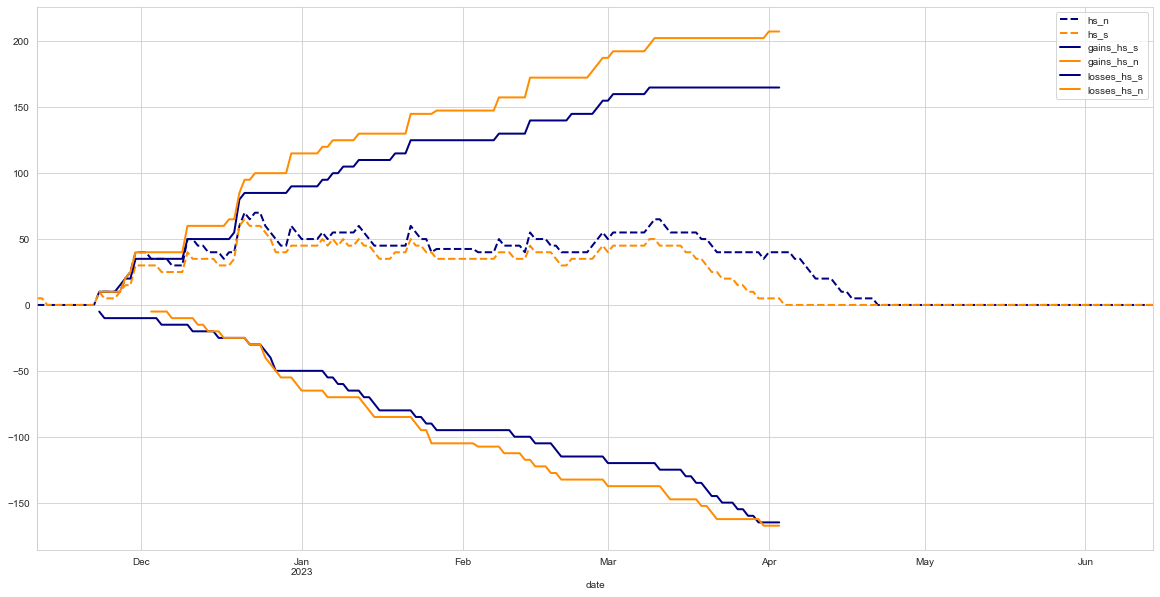

In [11]:
# set figure size 
fig = plt.figure(figsize=(20, 10))

C20['hs_n'].plot(color='navy', linewidth=2, linestyle='dashed')
C20['hs_s'].plot(color='darkorange', linewidth=2, linestyle='dashed')

C20['gains_hs_s'].plot(color='navy', linewidth=2)
C20['gains_hs_n'].plot(color='darkorange', linewidth=2)
C20['losses_hs_s'].plot(color='navy', linewidth=2)
C20['losses_hs_n'].plot(color='darkorange', linewidth=2)

plt.legend()

Now, make that code into a function. 

In [12]:
def cumulative_gain_loss(df):
    df['delta_hs_s'] = df['hs_s'].diff()
    df['gains_hs_s'] = np.cumsum(df['delta_hs_s'][df['delta_hs_s'] > 0])
    df['losses_hs_s'] = np.cumsum(df['delta_hs_s'][df['delta_hs_s'] < 0])

    df['delta_hs_n'] = df['hs_n'].diff()
    df['gains_hs_n'] = np.cumsum(df['delta_hs_n'][df['delta_hs_n'] > 0])
    df['losses_hs_n'] = np.cumsum(df['delta_hs_n'][df['delta_hs_n'] < 0])

    # where there is no gain between the gain values, then fill with the last value
    df['gains_hs_s'] = df['gains_hs_s'].fillna(method='ffill')
    df['gains_hs_n'] = df['gains_hs_n'].fillna(method='ffill')

    # where there is no loss between the loss values, then fill with the last value
    df['losses_hs_s'] = df['losses_hs_s'].fillna(method='ffill')
    df['losses_hs_n'] = df['losses_hs_n'].fillna(method='ffill')

    # now, set all the values to nan for the loss and gain calculations once one of the snow depth datasets are 0
    df.loc[df['hs_s'] == 0, ['gains_hs_s', 'losses_hs_s']] = np.nan
    df.loc[df['hs_n'] == 0, ['gains_hs_n', 'losses_hs_n']] = np.nan

    df.loc[df['hs_n'] == 0, ['gains_hs_s', 'losses_hs_s']] = np.nan
    df.loc[df['hs_s'] == 0, ['gains_hs_n', 'losses_hs_n']] = np.nan

    return df 

In [13]:
C20 = cumulative_gain_loss(C20)
C50 = cumulative_gain_loss(C50)
C60 = cumulative_gain_loss(C60)
C70 = cumulative_gain_loss(C70)
CF = cumulative_gain_loss(CF)
CG = cumulative_gain_loss(CG)

### Make individual plots for all the sites

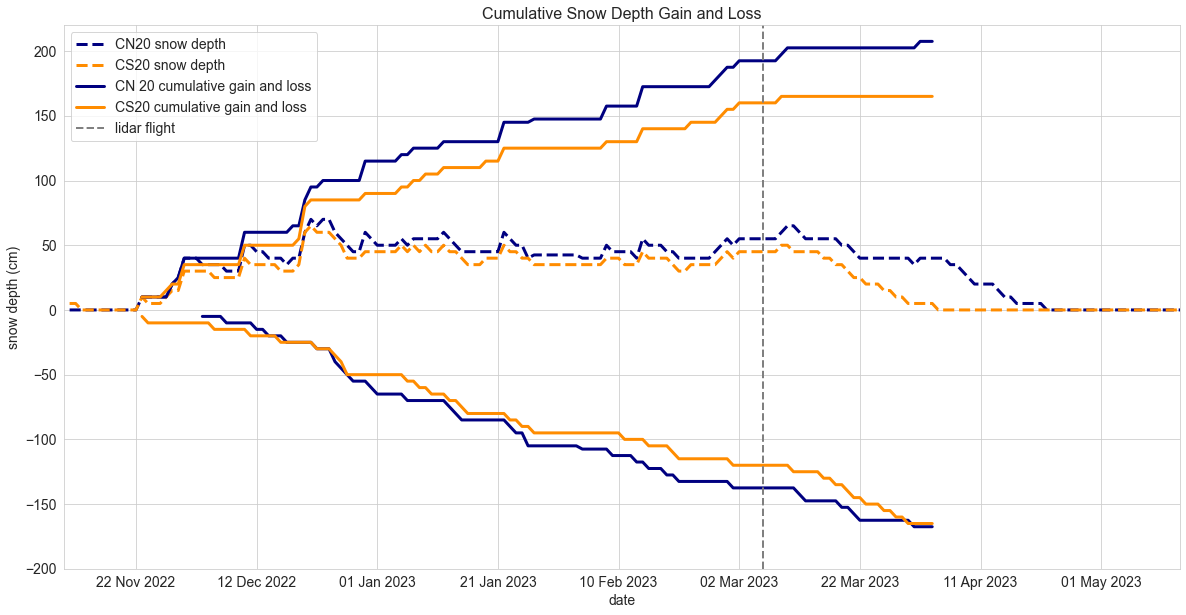

In [14]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3

C20['hs_n'].plot(label = 'CN20 snow depth', color='navy', linewidth=linewidth, linestyle='dashed')
C20['hs_s'].plot(label = 'CS20 snow depth', color='darkorange', linewidth=linewidth, linestyle='dashed')

C20['gains_hs_n'].plot( label = 'CN 20 cumulative gain and loss', color='navy', linewidth=linewidth)
C20['gains_hs_s'].plot( label = 'CS20 cumulative gain and loss', color='darkorange', linewidth=linewidth)
C20['losses_hs_n'].plot(label = '', color='navy', linewidth=linewidth)
C20['losses_hs_s'].plot(label = '', color='darkorange', linewidth=linewidth)

# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)
plt.legend(loc='upper left', fontsize=14)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))

# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.ylim(-200, 220)

plt.show()

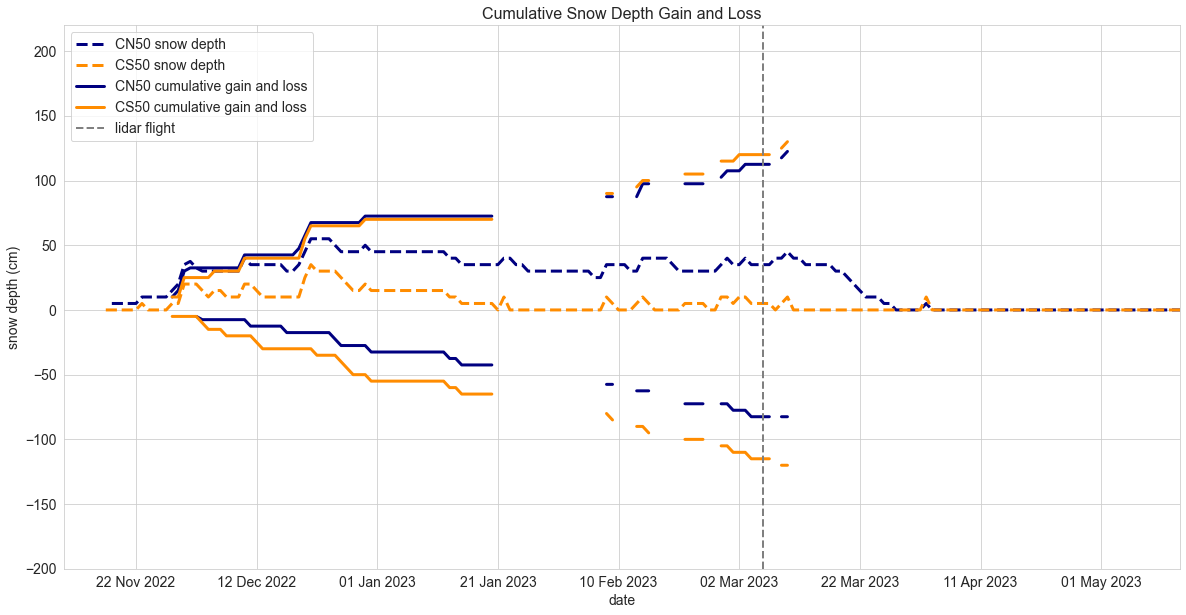

In [15]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3

C50['hs_n'].plot(label = 'CN50 snow depth', color='navy', linewidth=linewidth, linestyle='dashed')
C50['hs_s'].plot(label = 'CS50 snow depth', color='darkorange', linewidth=linewidth, linestyle='dashed')

C50['gains_hs_n'].plot( label = 'CN50 cumulative gain and loss', color='navy', linewidth=linewidth)
C50['gains_hs_s'].plot( label = 'CS50 cumulative gain and loss', color='darkorange', linewidth=linewidth)
C50['losses_hs_n'].plot(label = '', color='navy', linewidth=linewidth)
C50['losses_hs_s'].plot(label = '', color='darkorange', linewidth=linewidth)

# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)
plt.legend(loc='upper left', fontsize=14)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))

# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.ylim(-200, 220)

plt.show()

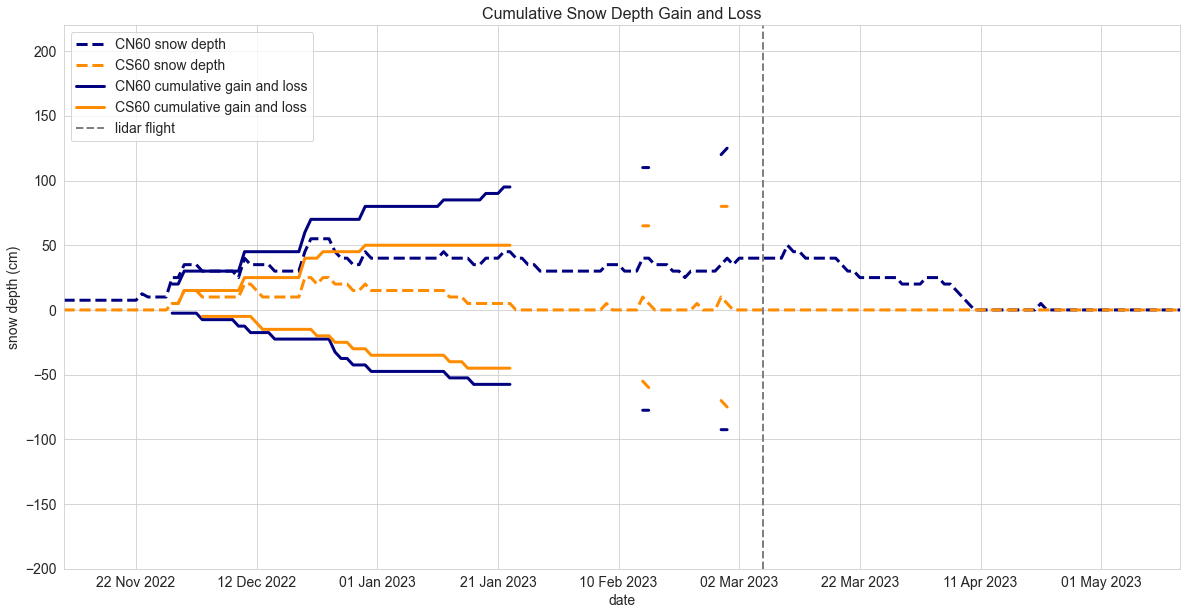

In [16]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3

C60['hs_n'].plot(label = 'CN60 snow depth', color='navy', linewidth=linewidth, linestyle='dashed')
C60['hs_s'].plot(label = 'CS60 snow depth', color='darkorange', linewidth=linewidth, linestyle='dashed')

C60['gains_hs_n'].plot( label = 'CN60 cumulative gain and loss', color='navy', linewidth=linewidth)
C60['gains_hs_s'].plot( label = 'CS60 cumulative gain and loss', color='darkorange', linewidth=linewidth)
C60['losses_hs_n'].plot(label = '', color='navy', linewidth=linewidth)
C60['losses_hs_s'].plot(label = '', color='darkorange', linewidth=linewidth)

# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)
plt.legend(loc='upper left', fontsize=14)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))

# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.ylim(-200, 220)

plt.show()

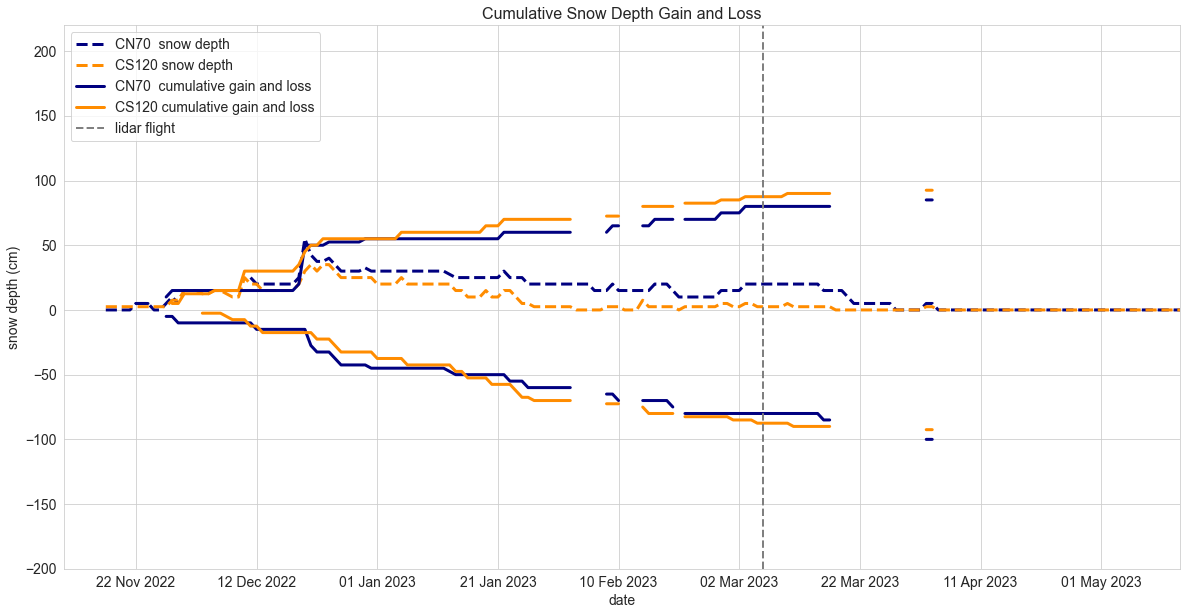

In [17]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3

C70['hs_n'].plot(label = 'CN70  snow depth', color='navy', linewidth=linewidth, linestyle='dashed')
C70['hs_s'].plot(label = 'CS120 snow depth', color='darkorange', linewidth=linewidth, linestyle='dashed')

C70['gains_hs_n'].plot( label = 'CN70  cumulative gain and loss', color='navy', linewidth=linewidth)
C70['gains_hs_s'].plot( label = 'CS120 cumulative gain and loss', color='darkorange', linewidth=linewidth)
C70['losses_hs_n'].plot(label = '', color='navy', linewidth=linewidth)
C70['losses_hs_s'].plot(label = '', color='darkorange', linewidth=linewidth)

# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)
plt.legend(loc='upper left', fontsize=14)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))

# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.ylim(-200, 220)

plt.show()

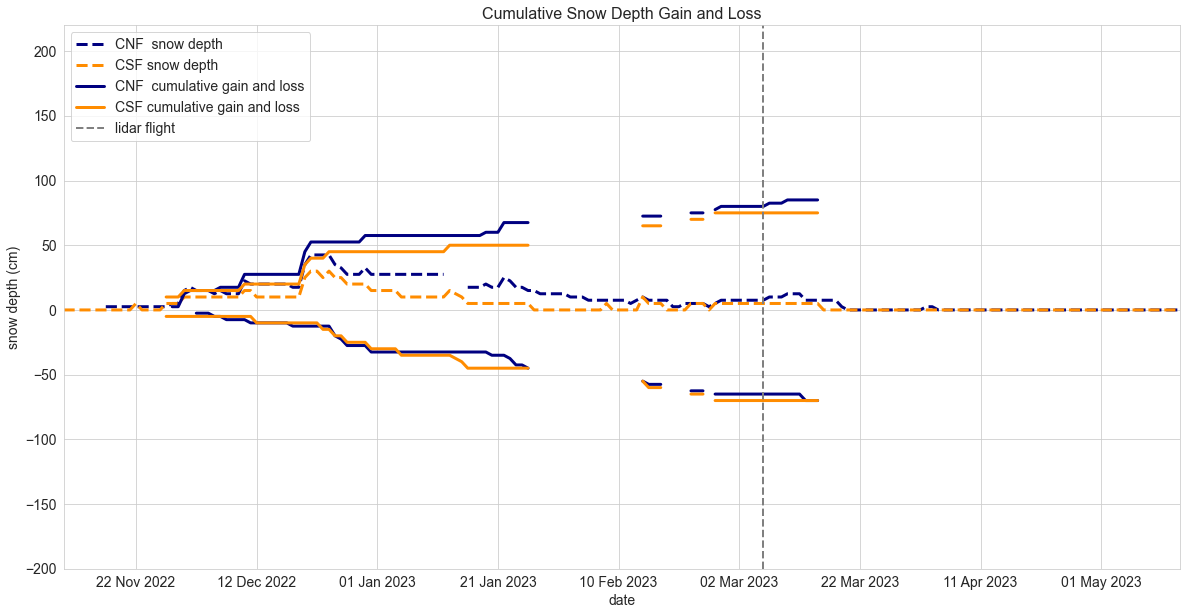

In [18]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3

CF['hs_n'].plot(label = 'CNF  snow depth', color='navy', linewidth=linewidth, linestyle='dashed')
CF['hs_s'].plot(label = 'CSF snow depth', color='darkorange', linewidth=linewidth, linestyle='dashed')

CF['gains_hs_n'].plot( label = 'CNF  cumulative gain and loss', color='navy', linewidth=linewidth)
CF['gains_hs_s'].plot( label = 'CSF cumulative gain and loss', color='darkorange', linewidth=linewidth)
CF['losses_hs_n'].plot(label = '', color='navy', linewidth=linewidth)
CF['losses_hs_s'].plot(label = '', color='darkorange', linewidth=linewidth)

# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)
plt.legend(loc='upper left', fontsize=14)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))

# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.ylim(-200, 220)

plt.show()

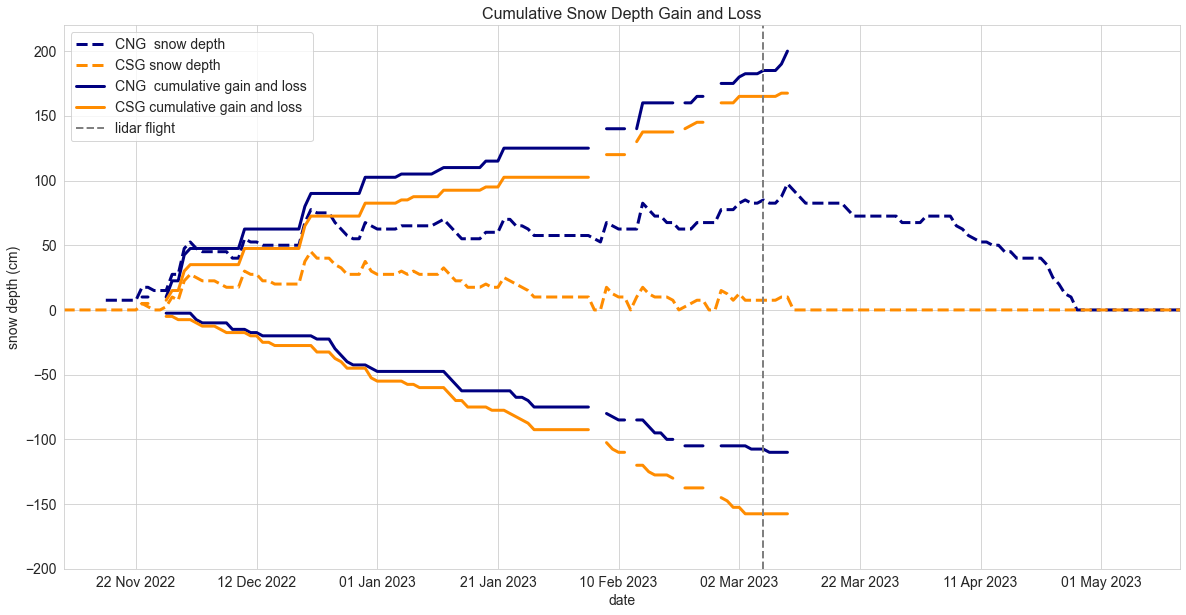

In [19]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3

CG['hs_n'].plot(label = 'CNG  snow depth', color='navy', linewidth=linewidth, linestyle='dashed')
CG['hs_s'].plot(label = 'CSG snow depth', color='darkorange', linewidth=linewidth, linestyle='dashed')

CG['gains_hs_n'].plot( label = 'CNG  cumulative gain and loss', color='navy', linewidth=linewidth)
CG['gains_hs_s'].plot( label = 'CSG cumulative gain and loss', color='darkorange', linewidth=linewidth)
CG['losses_hs_n'].plot(label = '', color='navy', linewidth=linewidth)
CG['losses_hs_s'].plot(label = '', color='darkorange', linewidth=linewidth)

# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)
plt.legend(loc='upper left', fontsize=14)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))

# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.ylim(-200, 220)

plt.show()

## Put all of these together on a single plot

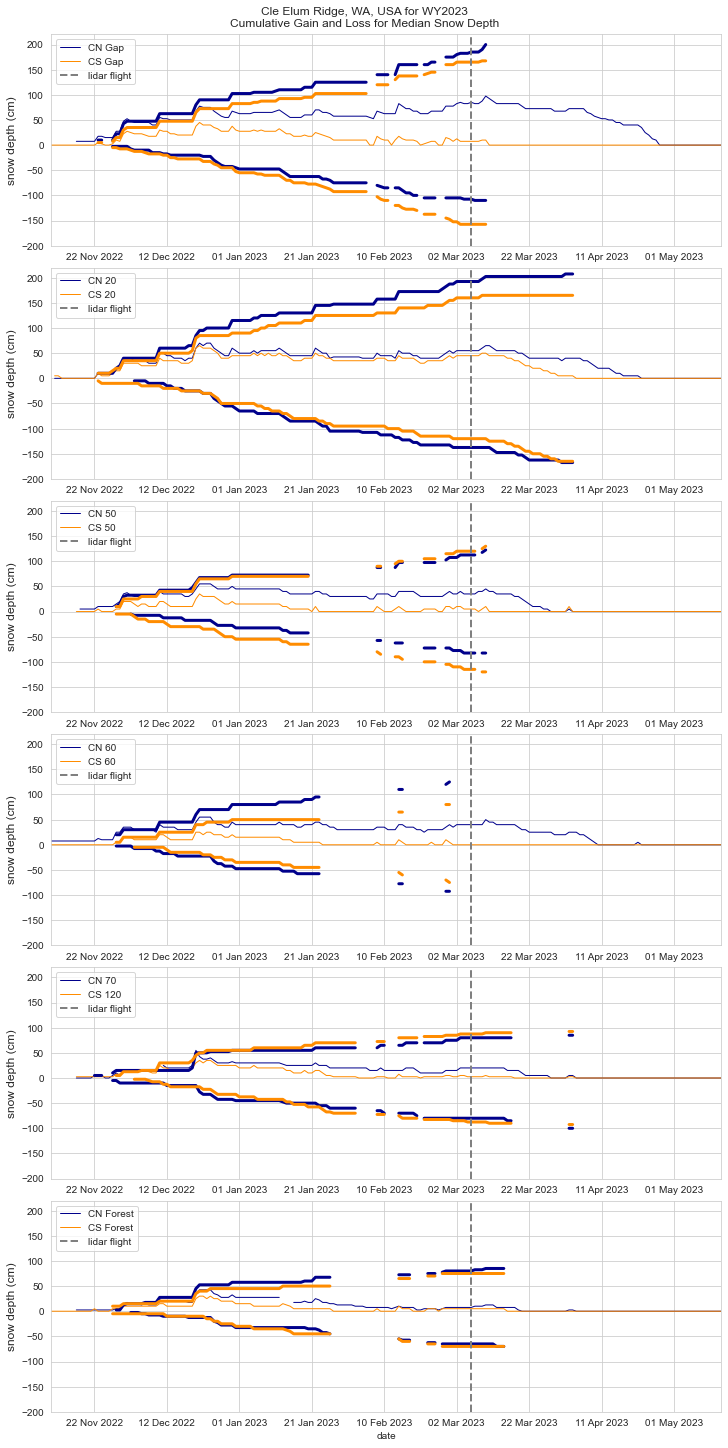

In [20]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above
sns.set_style("whitegrid")

fig, axes = plt.subplots(6,1, figsize = (10,20), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'
linewidth  = 3
linewidth2 = 1

# C-Gap
CG['hs_n'].plot(ax=axes[0], label = 'CN Gap', color=colornorth, linewidth=linewidth2)
CG['hs_s'].plot(ax=axes[0], label = 'CS Gap', color=colorsouth, linewidth=linewidth2)

CG['gains_hs_n'].plot(ax=axes[0],  label = '', color=colornorth, linewidth=linewidth)
CG['gains_hs_s'].plot(ax=axes[0],  label = '', color=colorsouth, linewidth=linewidth)
CG['losses_hs_n'].plot(ax=axes[0], label = '', color=colornorth, linewidth=linewidth)
CG['losses_hs_s'].plot(ax=axes[0], label = '', color=colorsouth, linewidth=linewidth)

# C-20
C20['hs_n'].plot(ax=axes[1], label = 'CN 20', color=colornorth, linewidth=linewidth2)
C20['hs_s'].plot(ax=axes[1], label = 'CS 20', color=colorsouth, linewidth=linewidth2)

C20['gains_hs_n'].plot(ax=axes[1],  label = '', color=colornorth, linewidth=linewidth)
C20['gains_hs_s'].plot(ax=axes[1],  label = '', color=colorsouth, linewidth=linewidth)
C20['losses_hs_n'].plot(ax=axes[1], label = '', color=colornorth, linewidth=linewidth)
C20['losses_hs_s'].plot(ax=axes[1], label = '', color=colorsouth, linewidth=linewidth)

# C-50
C50['hs_n'].plot(ax=axes[2], label = 'CN 50', color=colornorth, linewidth=linewidth2)
C50['hs_s'].plot(ax=axes[2], label = 'CS 50', color=colorsouth, linewidth=linewidth2)

C50['gains_hs_n'].plot(ax=axes[2],  label = '', color=colornorth, linewidth=linewidth)
C50['gains_hs_s'].plot(ax=axes[2],  label = '', color=colorsouth, linewidth=linewidth)
C50['losses_hs_n'].plot(ax=axes[2], label = '', color=colornorth, linewidth=linewidth)
C50['losses_hs_s'].plot(ax=axes[2], label = '', color=colorsouth, linewidth=linewidth)

# C-60
C60['hs_n'].plot(ax=axes[3], label = 'CN 60', color=colornorth, linewidth=linewidth2)
C60['hs_s'].plot(ax=axes[3], label = 'CS 60', color=colorsouth, linewidth=linewidth2)

C60['gains_hs_n'].plot(ax=axes[3],  label = '', color=colornorth, linewidth=linewidth)
C60['gains_hs_s'].plot(ax=axes[3],  label = '', color=colorsouth, linewidth=linewidth)
C60['losses_hs_n'].plot(ax=axes[3], label = '', color=colornorth, linewidth=linewidth)
C60['losses_hs_s'].plot(ax=axes[3], label = '', color=colorsouth, linewidth=linewidth)

# C-70 and 120
C70['hs_n'].plot(ax=axes[4], label = 'CN 70', color=colornorth, linewidth=linewidth2)
C70['hs_s'].plot(ax=axes[4], label = 'CS 120', color=colorsouth, linewidth=linewidth2)

C70['gains_hs_n'].plot(ax=axes[4],  label = '', color=colornorth, linewidth=linewidth)
C70['gains_hs_s'].plot(ax=axes[4],  label = '', color=colorsouth, linewidth=linewidth)
C70['losses_hs_n'].plot(ax=axes[4], label = '', color=colornorth, linewidth=linewidth)
C70['losses_hs_s'].plot(ax=axes[4], label = '', color=colorsouth, linewidth=linewidth)

# C-Forest
CF['hs_n'].plot(ax=axes[5], label = 'CN Forest', color=colornorth, linewidth=linewidth2)
CF['hs_s'].plot(ax=axes[5], label = 'CS Forest', color=colorsouth, linewidth=linewidth2)

CF['gains_hs_n'].plot(ax=axes[5],  label = '', color=colornorth, linewidth=linewidth)
CF['gains_hs_s'].plot(ax=axes[5],  label = '', color=colorsouth, linewidth=linewidth)
CF['losses_hs_n'].plot(ax=axes[5], label = '', color=colornorth, linewidth=linewidth)
CF['losses_hs_s'].plot(ax=axes[5], label = '', color=colorsouth, linewidth=linewidth)


# add lidar data flights
axes[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)
axes[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)
axes[2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)
axes[3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)
axes[4].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)
axes[5].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)


# set plotting constants
axes[0].set_ylim(-200,220)

axes[0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
axes[1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
axes[2].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
axes[3].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
axes[4].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
axes[5].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])

axes[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
axes[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
axes[2].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
axes[3].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
axes[4].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
axes[5].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

axes[0].set_ylabel("snow depth (cm)", fontsize=12)
axes[1].set_ylabel("snow depth (cm)", fontsize=12)
axes[2].set_ylabel("snow depth (cm)", fontsize=12)
axes[3].set_ylabel("snow depth (cm)", fontsize=12)
axes[4].set_ylabel("snow depth (cm)", fontsize=12)
axes[5].set_ylabel("snow depth (cm)", fontsize=12)

axes[0].set_xlabel(''); axes[1].set_xlabel(''); axes[2].set_xlabel(''); axes[3].set_xlabel(''); axes[4].set_xlabel('')

# add visible tik marks on the x-axis
axes[0].xaxis.set_major_locator(dates.DayLocator(interval=20))
axes[1].xaxis.set_major_locator(dates.DayLocator(interval=20))
axes[2].xaxis.set_major_locator(dates.DayLocator(interval=20))
axes[3].xaxis.set_major_locator(dates.DayLocator(interval=20))
axes[4].xaxis.set_major_locator(dates.DayLocator(interval=20))
axes[5].xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nCumulative Gain and Loss for Median Snow Depth")

axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
axes[2].legend(loc='upper left')
axes[3].legend(loc='upper left')
axes[4].legend(loc='upper left')
axes[5].legend(loc='upper left')

# axes[1].set_xticks(fontsize=14, rotation =360)

plt.show()

Now, make two subplots for the north and south sides with the median rates of gain and loss to compare. 

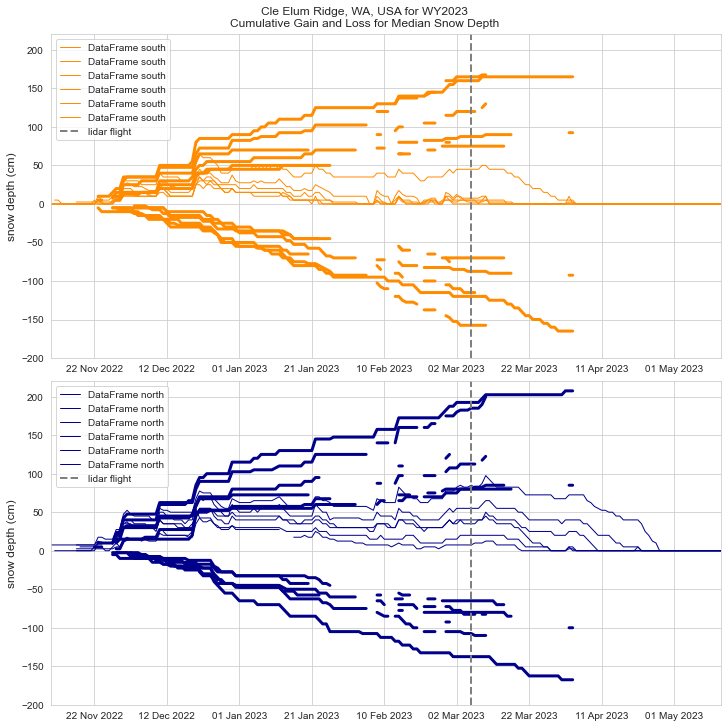

In [24]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 1, figsize = (10,10), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'
linewidth  = 3
linewidth2 = 1

# C-Gap, C20, C50, C60, C-70 and 120, and C-Forest
for i, df in enumerate([CG, C20, C50, C60, C70, CF]):
    df['hs_s'].plot(ax=axes[0], label=df.__class__.__name__ + ' south', color=colorsouth, linewidth=linewidth2)

    df['gains_hs_s'].plot(ax=axes[0],  label='', color=colorsouth, linewidth=linewidth)
    df['losses_hs_s'].plot(ax=axes[0], label = '', color=colorsouth, linewidth=linewidth)
    
for i, df in enumerate([CG, C20, C50, C60, C70, CF]):
    df['hs_n'].plot(ax=axes[1], label=df.__class__.__name__ + ' north', color=colornorth, linewidth=linewidth2)

    df['gains_hs_n'].plot(ax=axes[1],  label='', color=colornorth, linewidth=linewidth)
    df['losses_hs_n'].plot(ax=axes[1], label = '', color=colornorth, linewidth=linewidth)

# add lidar data flights
for ax in axes:
    ax.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# set plotting constants
axes[0].set_ylim(-200,220)

axes[0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
axes[1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])

axes[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
axes[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

axes[0].set_ylabel("snow depth (cm)", fontsize=12)
axes[1].set_ylabel("snow depth (cm)", fontsize=12)

axes[0].set_xlabel(''); axes[1].set_xlabel('');

# add visible tik marks on the x-axis
axes[0].xaxis.set_major_locator(dates.DayLocator(interval=20))
axes[1].xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nCumulative Gain and Loss for Median Snow Depth")

axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')

plt.show()

But, we really need to calculate the rates individually, since we previously calculated s and n together

In [21]:
def cumulative_gain_loss_single(df):
    df['delta_hs_s'] = df['hs_s'].diff()
    df['gains_hs_s'] = np.cumsum(df['delta_hs_s'][df['delta_hs_s'] > 0])
    df['losses_hs_s'] = np.cumsum(df['delta_hs_s'][df['delta_hs_s'] < 0])

    df['delta_hs_n'] = df['hs_n'].diff()
    df['gains_hs_n'] = np.cumsum(df['delta_hs_n'][df['delta_hs_n'] > 0])
    df['losses_hs_n'] = np.cumsum(df['delta_hs_n'][df['delta_hs_n'] < 0])

    # where there is no gain between the gain values, then fill with the last value
    df['gains_hs_s'] = df['gains_hs_s'].fillna(method='ffill')
    df['gains_hs_n'] = df['gains_hs_n'].fillna(method='ffill')

    # where there is no loss between the loss values, then fill with the last value
    df['losses_hs_s'] = df['losses_hs_s'].fillna(method='ffill')
    df['losses_hs_n'] = df['losses_hs_n'].fillna(method='ffill')

    # now, set all the values to nan for the loss and gain calculations once one of the snow depth datasets are 0
    df.loc[df['hs_s'] == 0, ['gains_hs_s', 'losses_hs_s']] = np.nan
    df.loc[df['hs_n'] == 0, ['gains_hs_n', 'losses_hs_n']] = np.nan

    # df.loc[df['hs_n'] == 0, ['gains_hs_s', 'losses_hs_s']] = np.nan # commenting out this line of code so that the values are only nan if itself is 0
    # df.loc[df['hs_s'] == 0, ['gains_hs_n', 'losses_hs_n']] = np.nan

    return df 

In [22]:
# create a new dataframe for each BAF group
C20_single = pd.DataFrame({'date': CS20['Date'], 'hs_s': CS20['Median_depth'], 'hs_n': CN20['Median_depth']})
C20_single.set_index('date', inplace=True)

C50_single = pd.DataFrame({'date': CS50['Date'], 'hs_s': CS50['Median_depth'], 'hs_n': CN50['Median_depth']})
C50_single.set_index('date', inplace=True)

C60_single = pd.DataFrame({'date': CS60['Date'], 'hs_s': CS60['Median_depth'], 'hs_n': CN60['Median_depth']})
C60_single.set_index('date', inplace=True)

# putting 120 and 70 together
C70_single = pd.DataFrame({'date': CS120['Date'], 'hs_s': CS120['Median_depth'], 'hs_n': CN70['Median_depth']})
C70_single.set_index('date', inplace=True)

# forest and gap sites
CF_single = pd.DataFrame({'date': CSF23['Date'], 'hs_s': CSF23['Median_depth'], 'hs_n': CNF23['Median_depth']})
CF_single.set_index('date', inplace=True)

CG_single = pd.DataFrame({'date': CSG23['Date'], 'hs_s': CSG23['Median_depth'], 'hs_n': CNG23['Median_depth']})
CG_single.set_index('date', inplace=True)


In [23]:
C20_single = cumulative_gain_loss_single(C20_single)
C50_single = cumulative_gain_loss_single(C50_single)
C60_single = cumulative_gain_loss_single(C60_single)
C70_single = cumulative_gain_loss_single(C70_single)
CF_single = cumulative_gain_loss_single(CF_single)
CG_single = cumulative_gain_loss_single(CG_single)

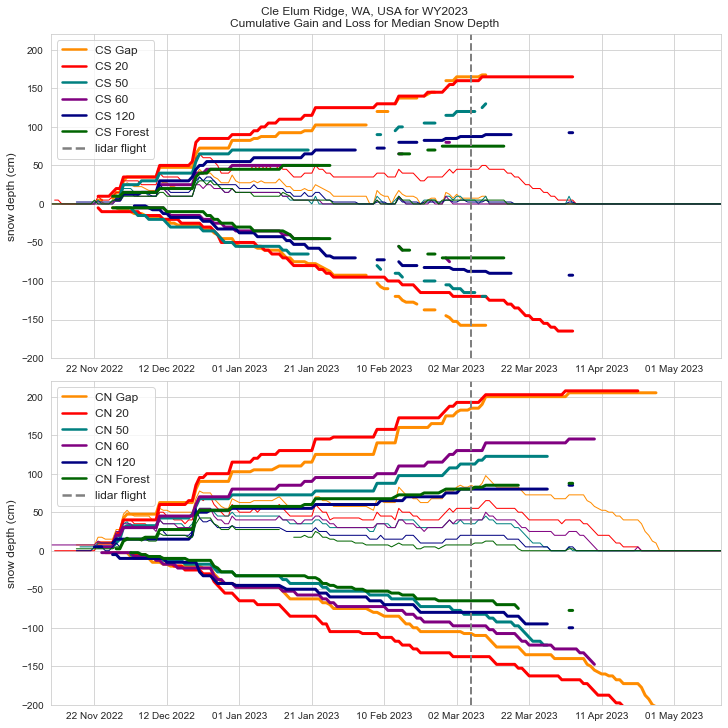

In [24]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 1, figsize = (10,10), sharey=True, sharex=False, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'
linewidth  = 3
linewidth2 = 1

# # C-Gap, C20, C50, C60, C-70 and 120, and C-Forest
# for i, df in enumerate([CG_single, C20_single, C50_single, C60_single, C70_single, CF_single]):
#     df['hs_s'].plot(ax=axes[0], label=df.__class__.__name__ + ' south', color=colorsouth, linewidth=linewidth2)

#     df['gains_hs_s'].plot(ax=axes[0],  label='', color=colorsouth, linewidth=linewidth)
#     df['losses_hs_s'].plot(ax=axes[0], label = '', color=colorsouth, linewidth=linewidth)
    
# for i, df in enumerate([CG, C20, C50, C60, C70, CF]):
#     df['hs_n'].plot(ax=axes[1], label=df.__class__.__name__ + ' north', color=colornorth, linewidth=linewidth2)

#     df['gains_hs_n'].plot(ax=axes[1],  label='', color=colornorth, linewidth=linewidth)
#     df['losses_hs_n'].plot(ax=axes[1], label = '', color=colornorth, linewidth=linewidth)

# colorsouth1 = 'bisque'; colorsouth2 = 'tan'; colorsouth3 = 'peru'; colorsouth4 = 'saddlebrown'; colorsouth5 = 'sienna'; colorsouth6 = 'chocolate'
# colornorth1 = 'lightsteelblue'; colornorth2 = 'skyblue'; colornorth3 = 'dodgerblue'; colornorth4 = 'royalblue'; colornorth5 = 'navy'; colornorth6 = 'midnightblue'

colorsouth1 = 'darkorange'; colorsouth2 = 'red'; colorsouth3 = 'teal'; colorsouth4 = 'purple'; colorsouth5 = 'navy'; colorsouth6 = 'darkgreen'
colornorth1 = 'darkorange'; colornorth2 = 'red'; colornorth3 = 'teal'; colornorth4 = 'purple'; colornorth5 = 'navy'; colornorth6 = 'darkgreen'

# south side
CG_single['hs_s'].plot(ax=axes[0], label='CS Gap',  color=colorsouth1, linewidth=linewidth2)
CG_single['gains_hs_s'].plot(ax=axes[0],  label='', color=colorsouth1, linewidth=linewidth)
CG_single['losses_hs_s'].plot(ax=axes[0], label = '', color=colorsouth1, linewidth=linewidth)

C20_single['hs_s'].plot(ax=axes[0], label='CS 20',  color=colorsouth2, linewidth=linewidth2)
C20_single['gains_hs_s'].plot(ax=axes[0],  label='', color=colorsouth2, linewidth=linewidth)
C20_single['losses_hs_s'].plot(ax=axes[0], label = '', color=colorsouth2, linewidth=linewidth)

C50_single['hs_s'].plot(ax=axes[0], label='CS 50',  color=colorsouth3, linewidth=linewidth2)
C50_single['gains_hs_s'].plot(ax=axes[0],  label='', color=colorsouth3, linewidth=linewidth)
C50_single['losses_hs_s'].plot(ax=axes[0], label = '', color=colorsouth3, linewidth=linewidth)

C60_single['hs_s'].plot(ax=axes[0], label='CS 60',  color=colorsouth4, linewidth=linewidth2)
C60_single['gains_hs_s'].plot(ax=axes[0],  label='', color=colorsouth4, linewidth=linewidth)
C60_single['losses_hs_s'].plot(ax=axes[0], label = '', color=colorsouth4, linewidth=linewidth)

C70_single['hs_s'].plot(ax=axes[0], label='CS 120',  color=colorsouth5, linewidth=linewidth2)
C70_single['gains_hs_s'].plot(ax=axes[0],  label='', color=colorsouth5, linewidth=linewidth)
C70_single['losses_hs_s'].plot(ax=axes[0], label = '', color=colorsouth5, linewidth=linewidth)

CF_single['hs_s'].plot(ax=axes[0], label='CS Forest',  color=colorsouth6, linewidth=linewidth2)
CF_single['gains_hs_s'].plot(ax=axes[0],  label='', color=colorsouth6, linewidth=linewidth)
CF_single['losses_hs_s'].plot(ax=axes[0], label = '', color=colorsouth6, linewidth=linewidth)

# north side
CG_single['hs_n'].plot(ax=axes[1], label='CN Gap',  color=colornorth1, linewidth=linewidth2)
CG_single['gains_hs_n'].plot(ax=axes[1],  label='', color=colornorth1, linewidth=linewidth)
CG_single['losses_hs_n'].plot(ax=axes[1], label = '', color=colornorth1, linewidth=linewidth)

C20_single['hs_n'].plot(ax=axes[1], label='CN 20',  color=colornorth2, linewidth=linewidth2)
C20_single['gains_hs_n'].plot(ax=axes[1],  label='', color=colornorth2, linewidth=linewidth)
C20_single['losses_hs_n'].plot(ax=axes[1], label = '', color=colornorth2, linewidth=linewidth)

C50_single['hs_n'].plot(ax=axes[1], label='CN 50',  color=colornorth3, linewidth=linewidth2)
C50_single['gains_hs_n'].plot(ax=axes[1],  label='', color=colornorth3, linewidth=linewidth)
C50_single['losses_hs_n'].plot(ax=axes[1], label = '', color=colornorth3, linewidth=linewidth)

C60_single['hs_n'].plot(ax=axes[1], label='CN 60',  color=colornorth4, linewidth=linewidth2)
C60_single['gains_hs_n'].plot(ax=axes[1],  label='', color=colornorth4, linewidth=linewidth)
C60_single['losses_hs_n'].plot(ax=axes[1], label = '', color=colornorth4, linewidth=linewidth)

C70_single['hs_n'].plot(ax=axes[1], label='CN 120',  color=colornorth5, linewidth=linewidth2)
C70_single['gains_hs_n'].plot(ax=axes[1],  label='', color=colornorth5, linewidth=linewidth)
C70_single['losses_hs_n'].plot(ax=axes[1], label = '', color=colornorth5, linewidth=linewidth)

CF_single['hs_n'].plot(ax=axes[1], label='CN Forest',  color=colornorth6, linewidth=linewidth2)
CF_single['gains_hs_n'].plot(ax=axes[1],  label='', color=colornorth6, linewidth=linewidth)
CF_single['losses_hs_n'].plot(ax=axes[1], label = '', color=colornorth6, linewidth=linewidth)


# add lidar data flights
for ax in axes:
    ax.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# set plotting constants
axes[0].set_ylim(-200,220)

axes[0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
axes[1].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])

axes[0].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
axes[1].xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))

axes[0].set_ylabel("snow depth (cm)", fontsize=12)
axes[1].set_ylabel("snow depth (cm)", fontsize=12)

axes[0].set_xlabel(''); axes[1].set_xlabel('');

# add visible tik marks on the x-axis
axes[0].xaxis.set_major_locator(dates.DayLocator(interval=20))
axes[1].xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nCumulative Gain and Loss for Median Snow Depth")

axes[0].legend(loc='upper left', fontsize=12)
axes[1].legend(loc='upper left', fontsize=12)

for line in axes[0].get_legend().get_lines():
    line.set_linewidth(2.5)
    
for line in axes[1].get_legend().get_lines():
    line.set_linewidth(2.5)

plt.show()

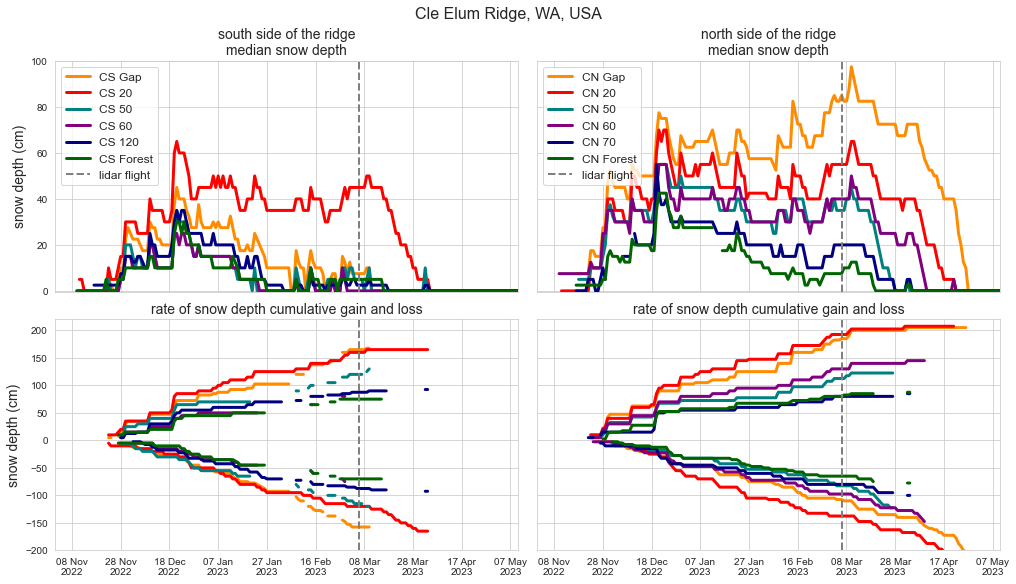

In [28]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize = (14,8), sharey='row', sharex=True, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'
linewidth  = 3
linewidth2 = 1

colorsouth1 = 'darkorange'; colorsouth2 = 'red'; colorsouth3 = 'teal'; colorsouth4 = 'purple'; colorsouth5 = 'navy'; colorsouth6 = 'darkgreen'
colornorth1 = 'darkorange'; colornorth2 = 'red'; colornorth3 = 'teal'; colornorth4 = 'purple'; colornorth5 = 'navy'; colornorth6 = 'darkgreen'

# First, we plot the snow depth on the top, then the gain and loss below them 

CG_single['hs_s'].plot(ax=axes[0,0], label='CS Gap',  color=colorsouth1, linewidth=linewidth)
C20_single['hs_s'].plot(ax=axes[0,0], label='CS 20',  color=colorsouth2, linewidth=linewidth)
C50_single['hs_s'].plot(ax=axes[0,0], label='CS 50',  color=colorsouth3, linewidth=linewidth)
C60_single['hs_s'].plot(ax=axes[0,0], label='CS 60',  color=colorsouth4, linewidth=linewidth)
C70_single['hs_s'].plot(ax=axes[0,0], label='CS 120',  color=colorsouth5, linewidth=linewidth)
CF_single['hs_s'].plot(ax=axes[0,0], label='CS Forest',  color=colorsouth6, linewidth=linewidth)

CG_single['hs_n'].plot(ax=axes[0,1], label='CN Gap',  color=colornorth1, linewidth=linewidth)
C20_single['hs_n'].plot(ax=axes[0,1], label='CN 20',  color=colornorth2, linewidth=linewidth)
C50_single['hs_n'].plot(ax=axes[0,1], label='CN 50',  color=colornorth3, linewidth=linewidth)
C60_single['hs_n'].plot(ax=axes[0,1], label='CN 60',  color=colornorth4, linewidth=linewidth)
C70_single['hs_n'].plot(ax=axes[0,1], label='CN 70',  color=colornorth5, linewidth=linewidth)
CF_single['hs_n'].plot(ax=axes[0,1], label='CN Forest',  color=colornorth6, linewidth=linewidth)

linewidth2 = 1
# south side
# CG_single['hs_s'].plot(ax=axes[1,0], label='CS Gap',  color=colorsouth1, linewidth=linewidth2)
CG_single['gains_hs_s'].plot(ax=axes[1,0],  label='', color=colorsouth1, linewidth=linewidth)
CG_single['losses_hs_s'].plot(ax=axes[1,0], label = '', color=colorsouth1, linewidth=linewidth)

# C20_single['hs_s'].plot(ax=axes[1,0], label='CS 20',  color=colorsouth2, linewidth=linewidth2)
C20_single['gains_hs_s'].plot(ax=axes[1,0],  label='', color=colorsouth2, linewidth=linewidth)
C20_single['losses_hs_s'].plot(ax=axes[1,0], label = '', color=colorsouth2, linewidth=linewidth)

# C50_single['hs_s'].plot(ax=axes[1,0], label='CS 50',  color=colorsouth3, linewidth=linewidth2)
C50_single['gains_hs_s'].plot(ax=axes[1,0],  label='', color=colorsouth3, linewidth=linewidth)
C50_single['losses_hs_s'].plot(ax=axes[1,0], label = '', color=colorsouth3, linewidth=linewidth)

# C60_single['hs_s'].plot(ax=axes[1,0], label='CS 60',  color=colorsouth4, linewidth=linewidth2)
C60_single['gains_hs_s'].plot(ax=axes[1,0],  label='', color=colorsouth4, linewidth=linewidth)
C60_single['losses_hs_s'].plot(ax=axes[1,0], label = '', color=colorsouth4, linewidth=linewidth)

# C70_single['hs_s'].plot(ax=axes[1,0], label='CS 120',  color=colorsouth5, linewidth=linewidth2)
C70_single['gains_hs_s'].plot(ax=axes[1,0],  label='', color=colorsouth5, linewidth=linewidth)
C70_single['losses_hs_s'].plot(ax=axes[1,0], label = '', color=colorsouth5, linewidth=linewidth)

# CF_single['hs_s'].plot(ax=axes[1,0], label='CS Forest',  color=colorsouth6, linewidth=linewidth2)
CF_single['gains_hs_s'].plot(ax=axes[1,0],  label='', color=colorsouth6, linewidth=linewidth)
CF_single['losses_hs_s'].plot(ax=axes[1,0], label = '', color=colorsouth6, linewidth=linewidth)

# north side
# CG_single['hs_n'].plot(ax=axes[1,1], label='CN Gap',  color=colornorth1, linewidth=linewidth2)
CG_single['gains_hs_n'].plot(ax=axes[1,1],  label='', color=colornorth1, linewidth=linewidth)
CG_single['losses_hs_n'].plot(ax=axes[1,1], label = '', color=colornorth1, linewidth=linewidth)

# C20_single['hs_n'].plot(ax=axes[1,1], label='CN 20',  color=colornorth2, linewidth=linewidth2)
C20_single['gains_hs_n'].plot(ax=axes[1,1],  label='', color=colornorth2, linewidth=linewidth)
C20_single['losses_hs_n'].plot(ax=axes[1,1], label = '', color=colornorth2, linewidth=linewidth)

# C50_single['hs_n'].plot(ax=axes[1,1], label='CN 50',  color=colornorth3, linewidth=linewidth2)
C50_single['gains_hs_n'].plot(ax=axes[1,1],  label='', color=colornorth3, linewidth=linewidth)
C50_single['losses_hs_n'].plot(ax=axes[1,1], label = '', color=colornorth3, linewidth=linewidth)

# C60_single['hs_n'].plot(ax=axes[1,1], label='CN 60',  color=colornorth4, linewidth=linewidth2)
C60_single['gains_hs_n'].plot(ax=axes[1,1],  label='', color=colornorth4, linewidth=linewidth)
C60_single['losses_hs_n'].plot(ax=axes[1,1], label = '', color=colornorth4, linewidth=linewidth)

# C70_single['hs_n'].plot(ax=axes[1,1], label='CN 120',  color=colornorth5, linewidth=linewidth2)
C70_single['gains_hs_n'].plot(ax=axes[1,1],  label='', color=colornorth5, linewidth=linewidth)
C70_single['losses_hs_n'].plot(ax=axes[1,1], label = '', color=colornorth5, linewidth=linewidth)

# CF_single['hs_n'].plot(ax=axes[1,1], label='CN Forest',  color=colornorth6, linewidth=linewidth2)
CF_single['gains_hs_n'].plot(ax=axes[1,1],  label='', color=colornorth6, linewidth=linewidth)
CF_single['losses_hs_n'].plot(ax=axes[1,1], label = '', color=colornorth6, linewidth=linewidth)

# plot the lidar flight in each plot as a verticle line
for ax in axes:
    ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)
    ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# # add lidar data flights
# for ax in axes:
#     ax.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# set plotting constants
axes[0,0].set_ylim(-0.5,100)
axes[1,0].set_ylim(-200,220)

axes[0,0].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 10)])
axes[0,1].set_xlim([datetime.date(2022, 11, 1), datetime.date(2023, 5, 10)])

axes[1,0].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))
axes[1,1].xaxis.set_major_formatter(dates.DateFormatter('%d %b\n%Y'))

axes[0,0].set_ylabel("snow depth (cm)", fontsize=14)
axes[1,0].set_ylabel("snow depth (cm)", fontsize=14)

axes[1,0].set_xlabel(''); axes[1,1].set_xlabel('');

# add visible tik marks on the x-axis
axes[0,0].xaxis.set_major_locator(dates.DayLocator(interval=20))
axes[0,1].xaxis.set_major_locator(dates.DayLocator(interval=20))

plt.suptitle("Cle Elum Ridge, WA, USA", fontsize=16)
axes[0,0].set_title("south side of the ridge\nmedian snow depth", fontsize=14)
axes[0,1].set_title("north side of the ridge\nmedian snow depth", fontsize=14)

axes[1,0].set_title("rate of snow depth cumulative gain and loss", fontsize=14)
axes[1,1].set_title("rate of snow depth cumulative gain and loss", fontsize=14)

# fig.text(0.04, 0.5, 'Cumulative Snow Depth Gain and Loss (cm)', va='center', rotation='horizontal', fontsize=14)

axes[0,0].legend(loc='upper left', fontsize=12)
axes[0,1].legend(loc='upper left', fontsize=12)

plt.show()

## Now, we want the min, max, and median rate for each of the sites

Make a version of the function which includes the min, median, and max values for each site.

In [24]:
#C20
C20_all = pd.DataFrame({'date': CS20['Date'], 'hs_min_s': CS20['Minimum_depth'], 'hs_min_n': CN20['Minimum_depth'],
                                          'hs_med_s': CS20['Median_depth'],  'hs_med_n': CN20['Median_depth'],
                                          'hs_max_s': CS20['Maximum_depth'], 'hs_max_n': CN20['Maximum_depth']})
C20_all.set_index('date', inplace=True)

# drop the first row of C20 only 
C20_all = C20_all.iloc[1:]

#C50
C50_all = pd.DataFrame({'date': CS50['Date'], 'hs_min_s': CS50['Minimum_depth'], 'hs_min_n': CN50['Minimum_depth'],
                                          'hs_med_s': CS50['Median_depth'],  'hs_med_n': CN50['Median_depth'],
                                          'hs_max_s': CS50['Maximum_depth'], 'hs_max_n': CN50['Maximum_depth']})
C50_all.set_index('date', inplace=True)

#C60
C60_all = pd.DataFrame({'date': CS60['Date'], 'hs_min_s': CS60['Minimum_depth'], 'hs_min_n': CN60['Minimum_depth'],
                                          'hs_med_s': CS60['Median_depth'],  'hs_med_n': CN60['Median_depth'],
                                          'hs_max_s': CS60['Maximum_depth'], 'hs_max_n': CN60['Maximum_depth']})
C60_all.set_index('date', inplace=True)

#C70 and 120
C70_all = pd.DataFrame({'date': CS120['Date'], 'hs_min_s': CS120['Minimum_depth'], 'hs_min_n': CN70['Minimum_depth'],
                                          'hs_med_s': CS120['Median_depth'],  'hs_med_n': CN70['Median_depth'],
                                          'hs_max_s': CS120['Maximum_depth'], 'hs_max_n': CN70['Maximum_depth']})
C70_all.set_index('date', inplace=True)

#CGap
CG_all = pd.DataFrame({'date': CSG23['Date'], 'hs_min_s': CSG23['Minimum_depth'], 'hs_min_n': CNG23['Minimum_depth'],
                                          'hs_med_s': CSG23['Median_depth'],  'hs_med_n': CNG23['Median_depth'],
                                          'hs_max_s': CSG23['Maximum_depth'], 'hs_max_n': CNG23['Maximum_depth']})
CG_all.set_index('date', inplace=True)

#CForest
CF_all = pd.DataFrame({'date': CSF23['Date'], 'hs_min_s': CSF23['Minimum_depth'], 'hs_min_n': CNF23['Minimum_depth'],
                                          'hs_med_s': CSF23['Median_depth'],  'hs_med_n': CNF23['Median_depth'],
                                          'hs_max_s': CSF23['Maximum_depth'], 'hs_max_n': CNF23['Maximum_depth']})
CF_all.set_index('date', inplace=True)

In [25]:
C20_all.head()

,hs_min_s,hs_min_n,hs_med_s,hs_med_n,hs_max_s,hs_max_n
date,,,,,,
2022-11-11,0.0,0.0,5.0,0.0,5.0,0.0
2022-11-12,0.0,0.0,5.0,0.0,5.0,0.0
2022-11-13,0.0,0.0,0.0,0.0,5.0,0.0
2022-11-14,0.0,0.0,0.0,0.0,0.0,0.0
2022-11-15,0.0,0.0,0.0,0.0,0.0,0.0


Now, make the function work for the minimum, median, and maximum snow depth measurements. 

In [28]:
def cumulative_gain_loss_all(df, columns):
    for col in columns:
        df[f'delta_{col}'] = df[col].diff()
        df[f'gains_{col}'] = np.cumsum(df[f'delta_{col}'][df[f'delta_{col}'] > 0])
        df[f'losses_{col}'] = np.cumsum(df[f'delta_{col}'][df[f'delta_{col}'] < 0])

        df[f'gains_{col}'] = df[f'gains_{col}'].fillna(method='ffill')
        df[f'losses_{col}'] = df[f'losses_{col}'].fillna(method='ffill')

        df.loc[df[col] == 0, [f'gains_{col}', f'losses_{col}']] = np.nan

    return df

In [154]:
columns = ['hs_min_s', 'hs_min_n', 'hs_med_s', 'hs_med_n', 'hs_max_s', 'hs_max_n']
test = cumulative_gain_loss_all(C20_all, columns)
test.head()

,hs_min_s,hs_min_n,hs_med_s,hs_med_n,hs_max_s,hs_max_n,delta_hs_min_s,gains_hs_min_s,losses_hs_min_s,delta_hs_min_n,...,losses_hs_med_s,delta_hs_med_n,gains_hs_med_n,losses_hs_med_n,delta_hs_max_s,gains_hs_max_s,losses_hs_max_s,delta_hs_max_n,gains_hs_max_n,losses_hs_max_n
date,,,,,,,,,,,,,,,,,,,,,
2022-11-11,0.0,0.0,5.0,0.0,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-12,0.0,0.0,5.0,0.0,5.0,0.0,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2022-11-13,0.0,0.0,0.0,0.0,5.0,0.0,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2022-11-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,-5.0,NaN,NaN,0.0,NaN,NaN
2022-11-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


In [32]:
C20_all = cumulative_gain_loss_all(C20_all, columns)
C50_all = cumulative_gain_loss_all(C50_all, columns)
C60_all = cumulative_gain_loss_all(C60_all, columns)
C70_all = cumulative_gain_loss_all(C70_all, columns)
CF_all  = cumulative_gain_loss_all(CF_all,  columns)
CG_all  = cumulative_gain_loss_all(CG_all,  columns)

### Now, plot the min, max, and median together for each site seperately. 

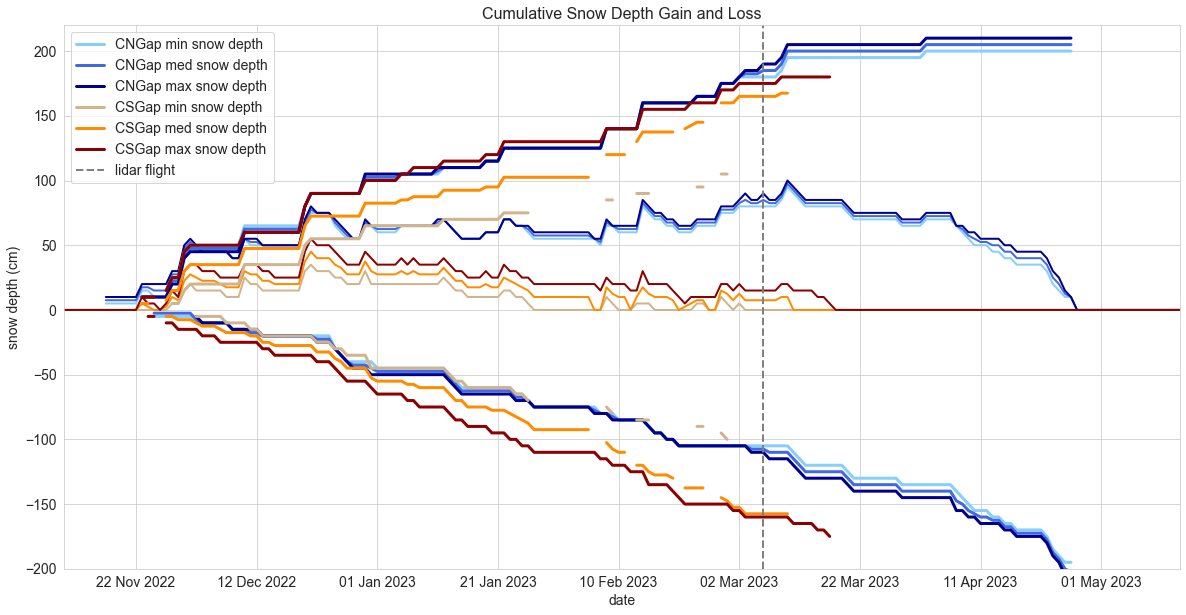

In [68]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3
linewidth2 =2

colormin_s = 'tan'; colormed_s = 'darkorange'; colormax_s = 'darkred'
colormin_n = 'lightskyblue'; colormed_n = 'royalblue'; colormax_n = 'darkblue'

# north
CG_all['hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth2)
CG_all['hs_med_n'].plot(label = '', color=colormed_n, linewidth=linewidth2)
CG_all['hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth2)

CG_all['gains_hs_min_n'].plot( label = 'CNGap min snow depth', color=colormin_n, linewidth=linewidth)
CG_all['gains_hs_med_n'].plot( label = 'CNGap med snow depth', color=colormed_n, linewidth=linewidth)
CG_all['gains_hs_max_n'].plot( label = 'CNGap max snow depth', color=colormax_n, linewidth=linewidth)
CG_all['losses_hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth)
CG_all['losses_hs_med_n'].plot(label = '', color=colormed_n, linewidth=linewidth)
CG_all['losses_hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth)


# south
CG_all['hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth2)
CG_all['hs_med_s'].plot(label = '', color=colormed_s, linewidth=linewidth2)
CG_all['hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth2)

CG_all['gains_hs_min_s'].plot( label = 'CSGap min snow depth', color=colormin_s, linewidth=linewidth)
CG_all['gains_hs_med_s'].plot( label = 'CSGap med snow depth', color=colormed_s, linewidth=linewidth)
CG_all['gains_hs_max_s'].plot( label = 'CSGap max snow depth', color=colormax_s, linewidth=linewidth)
CG_all['losses_hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth)
CG_all['losses_hs_med_s'].plot(label = '', color=colormed_s, linewidth=linewidth)
CG_all['losses_hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth)


# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))
# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))
plt.ylim(-200, 220)

    
plt.legend(loc='upper left', fontsize=14)
    
plt.show()

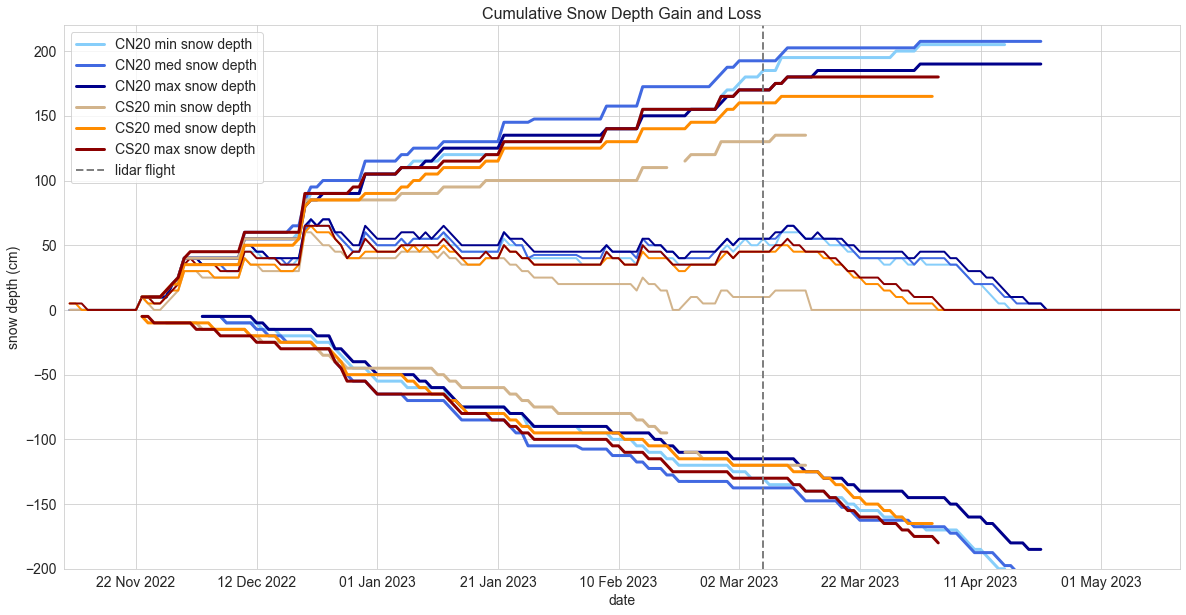

In [62]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3
linewidth2 =2

colormin_s = 'tan'; colormed_s = 'darkorange'; colormax_s = 'darkred'
colormin_n = 'lightskyblue'; colormed_n = 'royalblue'; colormax_n = 'darkblue'

# north
C20_all['hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth2)
C20_all['hs_med_n'].plot(label = '', color=colormed_n, linewidth=linewidth2)
C20_all['hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth2)

C20_all['gains_hs_min_n'].plot( label = 'CN20 min snow depth', color=colormin_n, linewidth=linewidth)
C20_all['gains_hs_med_n'].plot( label = 'CN20 med snow depth', color=colormed_n, linewidth=linewidth)
C20_all['gains_hs_max_n'].plot( label = 'CN20 max snow depth', color=colormax_n, linewidth=linewidth)
C20_all['losses_hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth)
C20_all['losses_hs_med_n'].plot(label = '', color=colormed_n, linewidth=linewidth)
C20_all['losses_hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth)


# south
C20_all['hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth2)
C20_all['hs_med_s'].plot(label = '', color=colormed_s, linewidth=linewidth2)
C20_all['hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth2)

C20_all['gains_hs_min_s'].plot( label = 'CS20 min snow depth', color=colormin_s, linewidth=linewidth)
C20_all['gains_hs_med_s'].plot( label = 'CS20 med snow depth', color=colormed_s, linewidth=linewidth)
C20_all['gains_hs_max_s'].plot( label = 'CS20 max snow depth', color=colormax_s, linewidth=linewidth)
C20_all['losses_hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth)
C20_all['losses_hs_med_s'].plot(label = '', color=colormed_s, linewidth=linewidth)
C20_all['losses_hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth)


# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))
# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))
plt.ylim(-200, 220)

    
plt.legend(loc='upper left', fontsize=14)
    
plt.show()

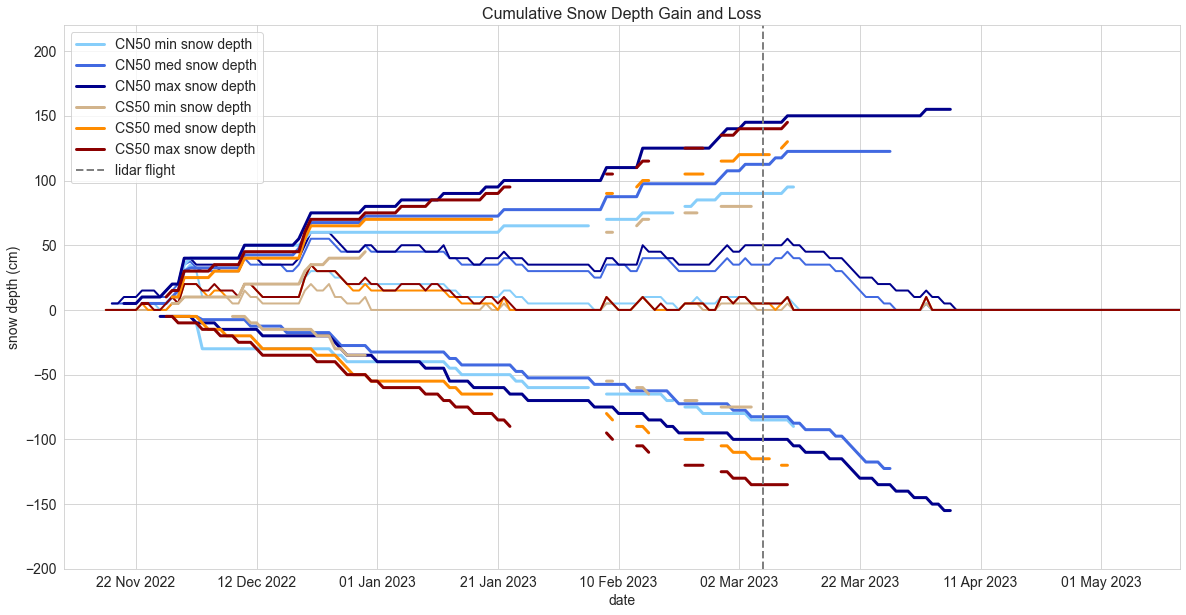

In [65]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3
linewidth2 =2

colormin_s = 'tan'; colormed_s = 'darkorange'; colormax_s = 'darkred'
colormin_n = 'lightskyblue'; colormed_n = 'royalblue'; colormax_n = 'darkblue'

# north
C50_all['hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth2)
C50_all['hs_med_n'].plot(label = '', color=colormed_n, linewidth=linewidth2)
C50_all['hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth2)

C50_all['gains_hs_min_n'].plot( label = 'CN50 min snow depth', color=colormin_n, linewidth=linewidth)
C50_all['gains_hs_med_n'].plot( label = 'CN50 med snow depth', color=colormed_n, linewidth=linewidth)
C50_all['gains_hs_max_n'].plot( label = 'CN50 max snow depth', color=colormax_n, linewidth=linewidth)
C50_all['losses_hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth)
C50_all['losses_hs_med_n'].plot(label = '', color=colormed_n, linewidth=linewidth)
C50_all['losses_hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth)


# south
C50_all['hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth2)
C50_all['hs_med_s'].plot(label = '', color=colormed_s, linewidth=linewidth2)
C50_all['hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth2)

C50_all['gains_hs_min_s'].plot( label = 'CS50 min snow depth', color=colormin_s, linewidth=linewidth)
C50_all['gains_hs_med_s'].plot( label = 'CS50 med snow depth', color=colormed_s, linewidth=linewidth)
C50_all['gains_hs_max_s'].plot( label = 'CS50 max snow depth', color=colormax_s, linewidth=linewidth)
C50_all['losses_hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth)
C50_all['losses_hs_med_s'].plot(label = '', color=colormed_s, linewidth=linewidth)
C50_all['losses_hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth)


# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))
# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))
plt.ylim(-200, 220)

    
plt.legend(loc='upper left', fontsize=14)
    
plt.show()

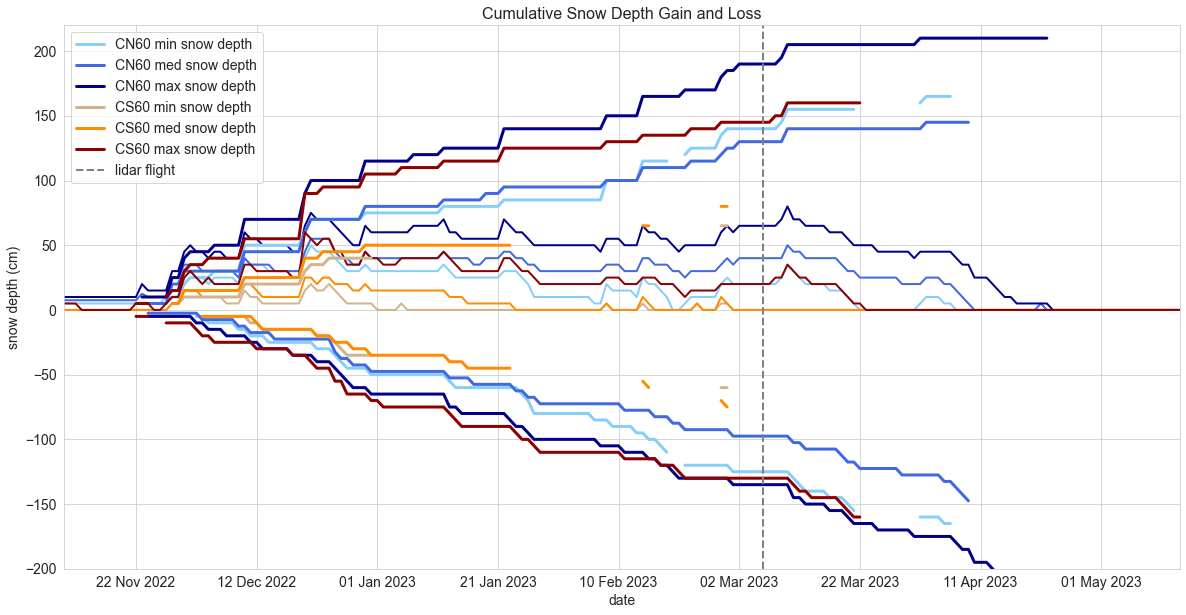

In [64]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3
linewidth2 =2

colormin_s = 'tan'; colormed_s = 'darkorange'; colormax_s = 'darkred'
colormin_n = 'lightskyblue'; colormed_n = 'royalblue'; colormax_n = 'darkblue'

# north
C60_all['hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth2)
C60_all['hs_med_n'].plot(label = '', color=colormed_n, linewidth=linewidth2)
C60_all['hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth2)

C60_all['gains_hs_min_n'].plot( label = 'CN60 min snow depth', color=colormin_n, linewidth=linewidth)
C60_all['gains_hs_med_n'].plot( label = 'CN60 med snow depth', color=colormed_n, linewidth=linewidth)
C60_all['gains_hs_max_n'].plot( label = 'CN60 max snow depth', color=colormax_n, linewidth=linewidth)
C60_all['losses_hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth)
C60_all['losses_hs_med_n'].plot(label = '', color=colormed_n, linewidth=linewidth)
C60_all['losses_hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth)


# south
C60_all['hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth2)
C60_all['hs_med_s'].plot(label = '', color=colormed_s, linewidth=linewidth2)
C60_all['hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth2)

C60_all['gains_hs_min_s'].plot( label = 'CS60 min snow depth', color=colormin_s, linewidth=linewidth)
C60_all['gains_hs_med_s'].plot( label = 'CS60 med snow depth', color=colormed_s, linewidth=linewidth)
C60_all['gains_hs_max_s'].plot( label = 'CS60 max snow depth', color=colormax_s, linewidth=linewidth)
C60_all['losses_hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth)
C60_all['losses_hs_med_s'].plot(label = '', color=colormed_s, linewidth=linewidth)
C60_all['losses_hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth)


# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))
# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))
plt.ylim(-200, 220)

    
plt.legend(loc='upper left', fontsize=14)
    
plt.show()

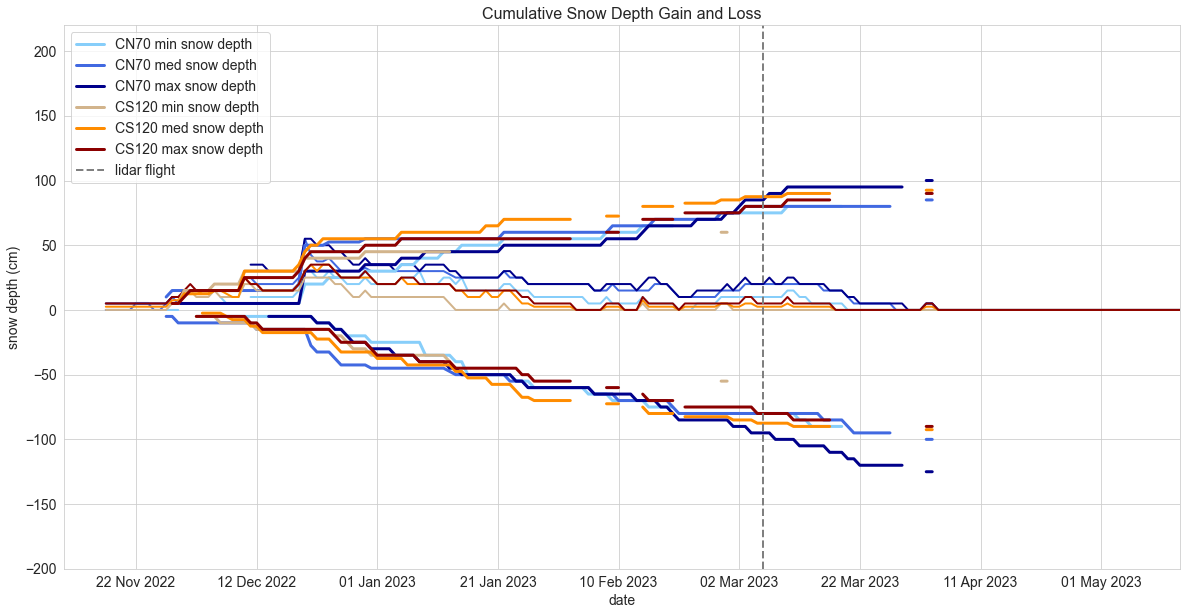

In [66]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3
linewidth2 =2

colormin_s = 'tan'; colormed_s = 'darkorange'; colormax_s = 'darkred'
colormin_n = 'lightskyblue'; colormed_n = 'royalblue'; colormax_n = 'darkblue'

# north
C70_all['hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth2)
C70_all['hs_med_n'].plot(label = '', color=colormed_n, linewidth=linewidth2)
C70_all['hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth2)

C70_all['gains_hs_min_n'].plot( label = 'CN70 min snow depth', color=colormin_n, linewidth=linewidth)
C70_all['gains_hs_med_n'].plot( label = 'CN70 med snow depth', color=colormed_n, linewidth=linewidth)
C70_all['gains_hs_max_n'].plot( label = 'CN70 max snow depth', color=colormax_n, linewidth=linewidth)
C70_all['losses_hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth)
C70_all['losses_hs_med_n'].plot(label = '', color=colormed_n, linewidth=linewidth)
C70_all['losses_hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth)


# south
C70_all['hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth2)
C70_all['hs_med_s'].plot(label = '', color=colormed_s, linewidth=linewidth2)
C70_all['hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth2)

C70_all['gains_hs_min_s'].plot( label = 'CS120 min snow depth', color=colormin_s, linewidth=linewidth)
C70_all['gains_hs_med_s'].plot( label = 'CS120 med snow depth', color=colormed_s, linewidth=linewidth)
C70_all['gains_hs_max_s'].plot( label = 'CS120 max snow depth', color=colormax_s, linewidth=linewidth)
C70_all['losses_hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth)
C70_all['losses_hs_med_s'].plot(label = '', color=colormed_s, linewidth=linewidth)
C70_all['losses_hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth)


# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))
# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))
plt.ylim(-200, 220)

    
plt.legend(loc='upper left', fontsize=14)
    
plt.show()

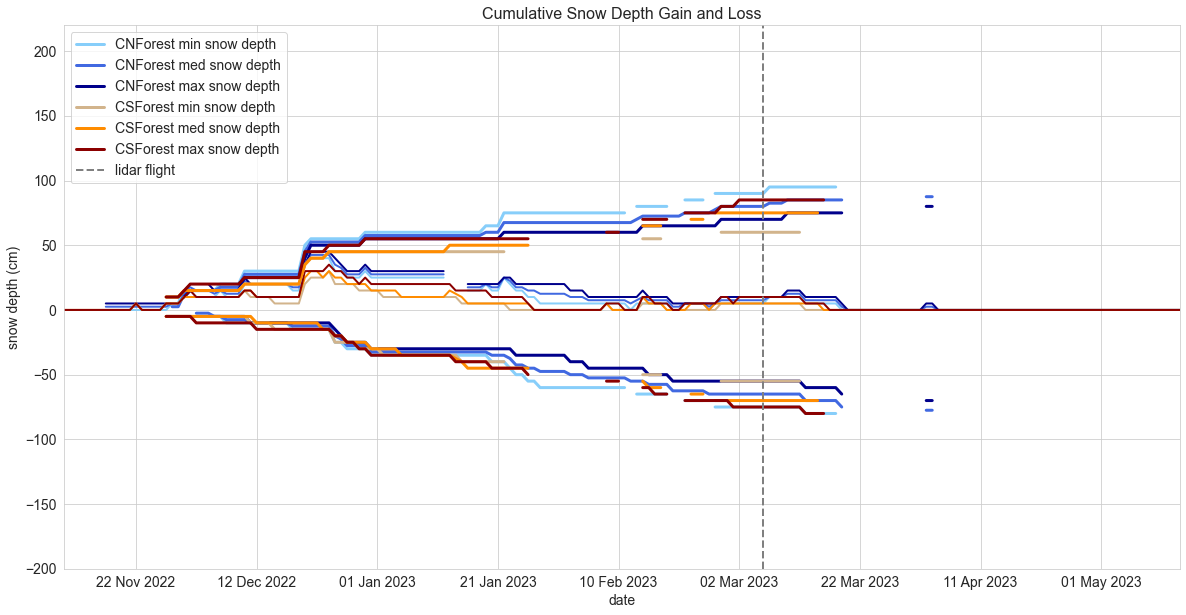

In [67]:
# set figure size 
fig = plt.figure(figsize=(20, 10))
linewidth = 3
linewidth2 =2

colormin_s = 'tan'; colormed_s = 'darkorange'; colormax_s = 'darkred'
colormin_n = 'lightskyblue'; colormed_n = 'royalblue'; colormax_n = 'darkblue'

# north
CF_all['hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth2)
CF_all['hs_med_n'].plot(label = '', color=colormed_n, linewidth=linewidth2)
CF_all['hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth2)

CF_all['gains_hs_min_n'].plot( label = 'CNForest min snow depth', color=colormin_n, linewidth=linewidth)
CF_all['gains_hs_med_n'].plot( label = 'CNForest med snow depth', color=colormed_n, linewidth=linewidth)
CF_all['gains_hs_max_n'].plot( label = 'CNForest max snow depth', color=colormax_n, linewidth=linewidth)
CF_all['losses_hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth)
CF_all['losses_hs_med_n'].plot(label = '', color=colormed_n, linewidth=linewidth)
CF_all['losses_hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth)


# south
CF_all['hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth2)
CF_all['hs_med_s'].plot(label = '', color=colormed_s, linewidth=linewidth2)
CF_all['hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth2)

CF_all['gains_hs_min_s'].plot( label = 'CSForest min snow depth', color=colormin_s, linewidth=linewidth)
CF_all['gains_hs_med_s'].plot( label = 'CSForest med snow depth', color=colormed_s, linewidth=linewidth)
CF_all['gains_hs_max_s'].plot( label = 'CSForest max snow depth', color=colormax_s, linewidth=linewidth)
CF_all['losses_hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth)
CF_all['losses_hs_med_s'].plot(label = '', color=colormed_s, linewidth=linewidth)
CF_all['losses_hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth)


# add a verticile line for the lidar flight
plt.axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=2)

# increase the size of all the labels and tick marks
plt.xticks(fontsize=14, rotation =360)
plt.yticks(fontsize=14)
plt.xlabel('date', fontsize=14)
plt.ylabel('snow depth (cm)', fontsize=14)
plt.title('Cumulative Snow Depth Gain and Loss', fontsize=16)


# set up the axis
plt.xlim(datetime.date(2022, 11, 10), datetime.date(2023, 5, 14))
# change how the date is displayed on the x-axis
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%d %b %Y'))
# add visible tik marks on the x-axis
plt.gca().xaxis.set_major_locator(dates.DayLocator(interval=20))
plt.ylim(-200, 220)

    
plt.legend(loc='upper left', fontsize=14)
    
plt.show()

In [ ]:
## Commenting this function out for now. I started it (completed the min snow depth variable calculations) but then did the below function instead with blackboxai. 
## So, come back to this to fix if the other function does not work. 
# def cumulative_gain_loss_all(df):
    
#     # for minimum snow depth
#     df['delta_hs_min_s'] = df['hs_min_s'].diff()
#     df['gains_hs_min_s'] = np.cumsum(df['delta_hs_min_s'][df['delta_hs_min_s'] > 0])
#     df['losses_hs_min_s'] = np.cumsum(df['delta_hs_min_s'][df['delta_hs_min_s'] < 0])

#     df['delta_hs_min_n'] = df['hs_min_s'].diff()
#     df['gains_hs_min_n'] = np.cumsum(df['delta_hs_min_n'][df['delta_hs_min_n'] > 0])
#     df['losses_hs_min_n'] = np.cumsum(df['delta_hs_min_n'][df['delta_hs_min_n'] < 0])

#     # where there is no gain between the gain values, then fill with the last value
#     df['gains_hs_min_s'] = df['gains_hs_min_s'].fillna(method='ffill')
#     df['gains_hs_min_n'] = df['gains_hs_min_n'].fillna(method='ffill')

#     # where there is no loss between the loss values, then fill with the last value
#     df['losses_hs_min_s'] = df['losses_hs_min_s'].fillna(method='ffill')
#     df['losses_hs_min_n'] = df['losses_hs_min_n'].fillna(method='ffill')

#     # now, set all the values to nan for the loss and gain calculations once one of the snow depth datasets are 0
#     df.loc[df['hs_min_s'] == 0, ['gains_hs_min_s', 'losses_hs_min_s']] = np.nan
#     df.loc[df['hs_min_s'] == 0, ['gains_hs_min_n', 'losses_hs_min_n']] = np.nan

#     # df.loc[df['hs_min_s'] == 0, ['gains_hs_min_s', 'losses_hs_min_s']] = np.nan # commenting out this line of code so that the values are only nan if itself is 0
#     # df.loc[df['hs_min_s'] == 0, ['gains_hs_min_n', 'losses_hs_min_n']] = np.nan

#     return df 

Create a figure with all of these together.

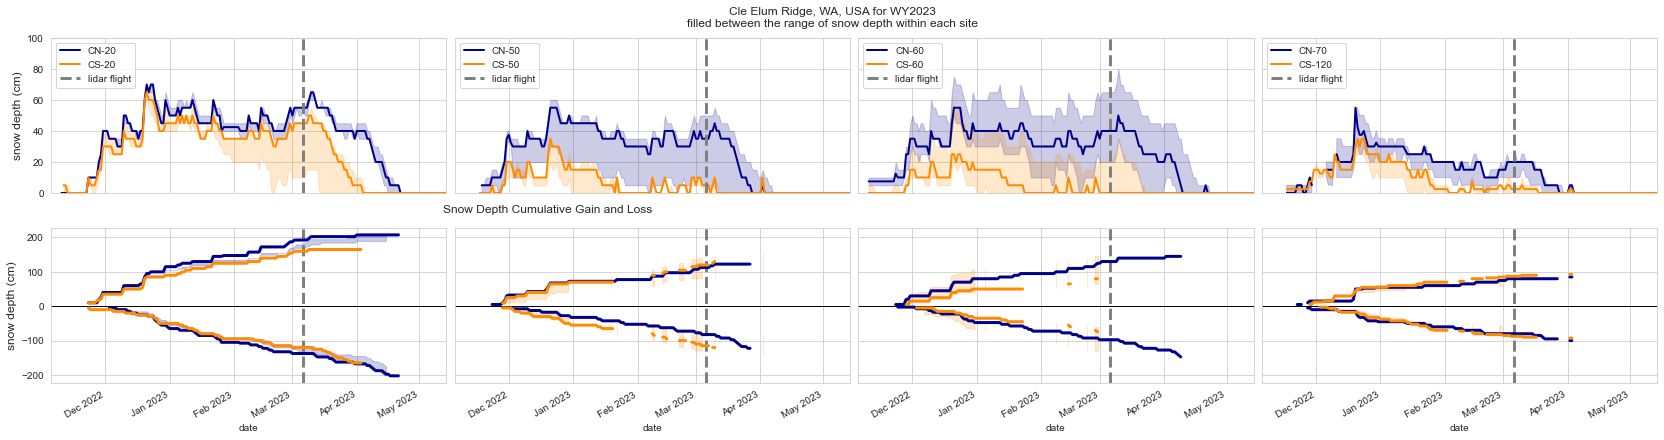

In [163]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,4,figsize = (23,6), sharey='row', sharex=True, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[0,0].fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0,1].fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0,2].fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0,3].fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = colornorth, alpha = alpha)

ax[0,0].fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[0,1].fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[0,2].fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[0,3].fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[0,0].plot(CN20['Date'], CN20['Median_depth'], color = colornorth, label="CN-20", linewidth=2)
ax[0,1].plot(CN50['Date'], CN50['Median_depth'], color = colornorth, label="CN-50"  , linewidth=2)
ax[0,2].plot(CN60['Date'], CN60['Median_depth'], color = colornorth, label="CN-60"  , linewidth=2)
ax[0,3].plot(CN70['Date'], CN70['Median_depth'], color = colornorth, label="CN-70"  , linewidth=2)

ax[0,0].plot(CS20['Date'], CS20['Median_depth'], color = colorsouth, label="CS-20", linewidth=2)
ax[0,1].plot(CS50['Date'], CS50['Median_depth'], color = colorsouth, label="CS-50",  linewidth=2)
ax[0,2].plot(CS60['Date'], CS60['Median_depth'], color = colorsouth, label="CS-60",  linewidth=2)
ax[0,3].plot(CS120['Date'], CS120['Median_depth'], color = colorsouth, label="CS-120",  linewidth=2)


# add lines for the lidar data flights
ax[0,0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=3)
ax[0,1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=3)
ax[0,2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=3)
ax[0,3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=3)

ax[1,0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="", linewidth=3)
ax[1,1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="", linewidth=3)
ax[1,2].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="", linewidth=3)
ax[1,3].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="", linewidth=3)

# plot a black line for the cumulative gain and loss plots
linewidth_zero = 1
ax[1,0].axhline(y=0, color='black', linestyle='-', linewidth=linewidth_zero)
ax[1,1].axhline(y=0, color='black', linestyle='-', linewidth=linewidth_zero)
ax[1,2].axhline(y=0, color='black', linestyle='-', linewidth=linewidth_zero)
ax[1,3].axhline(y=0, color='black', linestyle='-', linewidth=linewidth_zero)


# cumulative gain and loss plots 
linewidth = 3
linewidth2 =2

colormin_s = 'tan'; colormed_s = 'darkorange'; colormax_s = 'darkred'
colormin_n = 'lightskyblue'; colormed_n = 'royalblue'; colormax_n = 'darkblue'

# north
# #C70_all['hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth2)
# C70_all['hs_med_n'].plot(ax=ax[1,0], label = '', color=colormed_n, linewidth=linewidth2)
# #C70_all['hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth2)

#C70_all['gains_hs_min_n'].plot( label = 'CN70 min snow depth', color=colormin_n, linewidth=linewidth)
C70_all['gains_hs_med_n'].plot(ax=ax[1,3], label = '', color=colornorth, linewidth=linewidth)
#C70_all['gains_hs_max_n'].plot( label = 'CN70 max snow depth', color=colormax_n, linewidth=linewidth)
#C70_all['losses_hs_min_n'].plot(label = '', color=colormin_n, linewidth=linewidth)
C70_all['losses_hs_med_n'].plot(ax=ax[1,3], label = '', color=colornorth, linewidth=linewidth)
#C70_all['losses_hs_max_n'].plot(label = '', color=colormax_n, linewidth=linewidth)


# south
# #C70_all['hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth2)
# C70_all['hs_med_s'].plot(label = '', color=colormed_s, linewidth=linewidth2)
# #C70_all['hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth2)

#C70_all['gains_hs_min_s'].plot( label = 'CS120 min snow depth', color=colormin_s, linewidth=linewidth)
C70_all['gains_hs_med_s'].plot(ax=ax[1,3], label = '', color=colorsouth, linewidth=linewidth)
#C70_all['gains_hs_max_s'].plot( label = 'CS120 max snow depth', color=colormax_s, linewidth=linewidth)
#C70_all['losses_hs_min_s'].plot(label = '', color=colormin_s, linewidth=linewidth)
C70_all['losses_hs_med_s'].plot(ax=ax[1,3], label = '', color=colorsouth, linewidth=linewidth)
#C70_all['losses_hs_max_s'].plot(label = '', color=colormax_s, linewidth=linewidth)


C20_all['gains_hs_med_n'].plot( ax=ax[1,0], label = '', color=colornorth, linewidth=linewidth)
C20_all['losses_hs_med_n'].plot(ax=ax[1,0], label = '', color=colornorth, linewidth=linewidth)
C20_all['gains_hs_med_s'].plot( ax=ax[1,0], label = '', color=colorsouth, linewidth=linewidth)
C20_all['losses_hs_med_s'].plot(ax=ax[1,0], label = '', color=colorsouth, linewidth=linewidth)

C50_all['gains_hs_med_n'].plot( ax=ax[1,1], label = '', color=colornorth, linewidth=linewidth)
C50_all['losses_hs_med_n'].plot(ax=ax[1,1], label = '', color=colornorth, linewidth=linewidth)
C50_all['gains_hs_med_s'].plot( ax=ax[1,1], label = '', color=colorsouth, linewidth=linewidth)
C50_all['losses_hs_med_s'].plot(ax=ax[1,1], label = '', color=colorsouth, linewidth=linewidth)

C60_all['gains_hs_med_n'].plot( ax=ax[1,2], label = '', color=colornorth, linewidth=linewidth)
C60_all['losses_hs_med_n'].plot(ax=ax[1,2], label = '', color=colornorth, linewidth=linewidth)
C60_all['gains_hs_med_s'].plot( ax=ax[1,2], label = '', color=colorsouth, linewidth=linewidth)
C60_all['losses_hs_med_s'].plot(ax=ax[1,2], label = '', color=colorsouth, linewidth=linewidth)

# now fill between the min and max gain and loss 
ax[1,0].fill_between(C20_all.index, C20_all['gains_hs_min_n'],  C20_all['gains_hs_max_n'],  color = colornorth, alpha = alpha)
ax[1,0].fill_between(C20_all.index, C20_all['losses_hs_min_n'], C20_all['losses_hs_max_n'], color = colornorth, alpha = alpha)
ax[1,1].fill_between(C50_all.index, C50_all['gains_hs_min_s'],  C50_all['gains_hs_max_s'],  color = colorsouth, alpha = alpha)
ax[1,1].fill_between(C50_all.index, C50_all['losses_hs_min_s'], C50_all['losses_hs_max_s'], color = colorsouth, alpha = alpha)
ax[1,2].fill_between(C60_all.index, C60_all['gains_hs_min_s'],  C60_all['gains_hs_max_s'],  color = colorsouth, alpha = alpha)
ax[1,2].fill_between(C60_all.index, C60_all['losses_hs_min_s'], C60_all['losses_hs_max_s'], color = colorsouth, alpha = alpha)
ax[1,3].fill_between(C70_all.index, C70_all['gains_hs_min_s'],  C70_all['gains_hs_max_s'],  color = colorsouth, alpha = alpha)
ax[1,3].fill_between(C70_all.index, C70_all['losses_hs_min_s'], C70_all['losses_hs_max_s'], color = colorsouth, alpha = alpha)

# set plotting constants
ax[0,0].set_ylim(0,100)

ax[0,0].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[0,1].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[0,2].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[0,3].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])

ax[0,0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[0,1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[0,2].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[0,3].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0,0].set_ylabel("snow depth (cm)", fontsize=12)
ax[1,0].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0,0].legend(loc='upper left');ax[0,1].legend(loc='upper left');ax[0,2].legend(loc='upper left');ax[0,3].legend(loc='upper left')
# ax[1,0].legend(loc='upper left');ax[1,1].legend(loc='upper left');ax[1,2].legend(loc='upper left');ax[1,3].legend(loc='upper left')

ax[1,1].set_title('Snow Depth Cumulative Gain and Loss', y=1.06, x=0.5, fontsize=12, loc='right')

plt.show()

Do the same thing for forest and gap sites. 

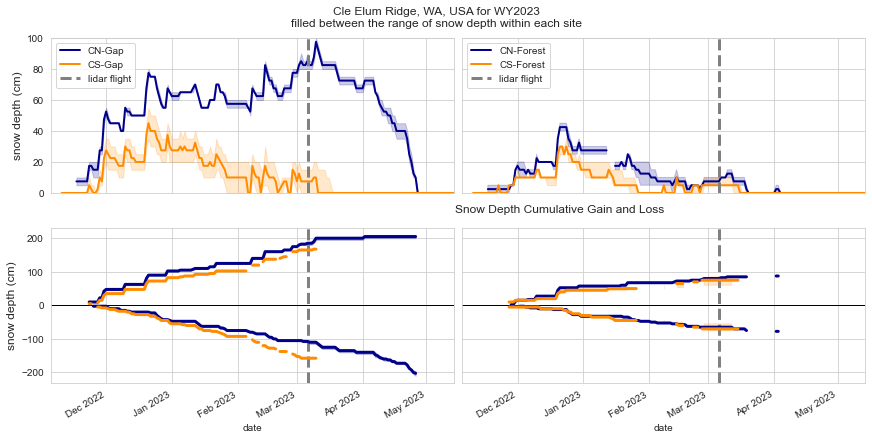

In [164]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,2,figsize = (12,6), sharey='row', sharex=True, constrained_layout=True)

alpha=0.2

colornorth = 'darkblue'
colorsouth = 'darkorange'

# TREATMENT SITES
# fill between the other treatment sites for the north and south sides
ax[0,0].fill_between(CNG23['Date'], CNG23['Maximum_depth'], CNG23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0,1].fill_between(CNF23['Date'], CNF23['Maximum_depth'], CNF23['Minimum_depth'], color = colornorth, alpha = alpha)
ax[0,0].fill_between(CSG23['Date'], CSG23['Maximum_depth'], CSG23['Minimum_depth'], color = colorsouth, alpha = alpha)
ax[0,1].fill_between(CSF23['Date'], CSF23['Maximum_depth'], CSF23['Minimum_depth'], color = colorsouth, alpha = alpha)

# add the other treatment sites for the north and south sides
ax[0,0].plot(CNG23['Date'], CNG23['Median_depth'], color = colornorth, label="CN-Gap", linewidth=2)
ax[0,1].plot(CNF23['Date'], CNF23['Median_depth'], color = colornorth, label="CN-Forest"  , linewidth=2)
ax[0,0].plot(CSG23['Date'], CSG23['Median_depth'], color = colorsouth, label="CS-Gap", linewidth=2)
ax[0,1].plot(CSF23['Date'], CSF23['Median_depth'], color = colorsouth, label="CS-Forest",  linewidth=2)


# add lines for the lidar data flights
ax[0,0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=3)
ax[0,1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="lidar flight", linewidth=3)
ax[1,0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="", linewidth=3)
ax[1,1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="", linewidth=3)


# plot a black line for the cumulative gain and loss plots
linewidth_zero = 1
ax[1,0].axhline(y=0, color='black', linestyle='-', linewidth=linewidth_zero)
ax[1,1].axhline(y=0, color='black', linestyle='-', linewidth=linewidth_zero)

# cumulative gain and loss plots 
linewidth = 3
linewidth2 =2

colormin_s = 'tan'; colormed_s = 'darkorange'; colormax_s = 'darkred'
colormin_n = 'lightskyblue'; colormed_n = 'royalblue'; colormax_n = 'darkblue'

CG_all['gains_hs_med_n'].plot( ax=ax[1,0], label = '', color=colornorth, linewidth=linewidth)
CG_all['losses_hs_med_n'].plot(ax=ax[1,0], label = '', color=colornorth, linewidth=linewidth)
CG_all['gains_hs_med_s'].plot( ax=ax[1,0], label = '', color=colorsouth, linewidth=linewidth)
CG_all['losses_hs_med_s'].plot(ax=ax[1,0], label = '', color=colorsouth, linewidth=linewidth)

CF_all['gains_hs_med_n'].plot( ax=ax[1,1], label = '', color=colornorth, linewidth=linewidth)
CF_all['losses_hs_med_n'].plot(ax=ax[1,1], label = '', color=colornorth, linewidth=linewidth)
CF_all['gains_hs_med_s'].plot( ax=ax[1,1], label = '', color=colorsouth, linewidth=linewidth)
CF_all['losses_hs_med_s'].plot(ax=ax[1,1], label = '', color=colorsouth, linewidth=linewidth)


# now fill between the min and max gain and loss 
ax[1,0].fill_between(CG_all.index, CG_all['gains_hs_min_n'],  CG_all['gains_hs_max_n'],  color = colornorth, alpha = alpha)
ax[1,0].fill_between(CG_all.index, CG_all['losses_hs_min_n'], CG_all['losses_hs_max_n'], color = colornorth, alpha = alpha)
ax[1,1].fill_between(CF_all.index, CF_all['gains_hs_min_s'],  CF_all['gains_hs_max_s'],  color = colorsouth, alpha = alpha)
ax[1,1].fill_between(CF_all.index, CF_all['losses_hs_min_s'], CF_all['losses_hs_max_s'], color = colorsouth, alpha = alpha)


# set plotting constants
ax[0,0].set_ylim(0,100)

ax[0,0].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])
ax[0,1].set_xlim([datetime.date(2022, 11, 5), datetime.date(2023, 5, 14)])

ax[0,0].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
ax[0,1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))

ax[0,0].set_ylabel("snow depth (cm)", fontsize=12)
ax[1,0].set_ylabel("snow depth (cm)", fontsize=12)

plt.suptitle("Cle Elum Ridge, WA, USA for WY2023\nfilled between the range of snow depth within each site")

ax[0,0].legend(loc='upper left');ax[0,1].legend(loc='upper left')

ax[1,1].set_title('Snow Depth Cumulative Gain and Loss', y=1.06, x=0.5, fontsize=12, loc='right')

plt.show()

## Make box plots like Dickerson-Lange et al. (2017) for the difference in cumulative gain and loss between the sites. 

* We want to compare the cumulative gain on the north side compared the he cumulative gain on the south side, verse the cumulative loss on the north side compared tot he cumulative loss on the south side. 
* Do this for peak snow depth, at the time of the first SDD, and for the change in SDD

In [77]:
# find the date with the peak snow depth 
print(C20_all['hs_med_s'].idxmax())
print(C20_all['hs_med_n'].idxmax())

# now find the value for cumulative gain and loss at the date of peak snow depth 
print(C20_all.loc['2022-12-21', ['gains_hs_med_s', 'losses_hs_med_s']])
print(C20_all.loc['2022-12-21', ['gains_hs_med_n', 'losses_hs_med_n']])


2022-12-21 00:00:00
2022-12-21 00:00:00
gains_hs_med_s     85.0
losses_hs_med_s   -25.0
Name: 2022-12-21 00:00:00, dtype: float64
gains_hs_med_n     95.0
losses_hs_med_n   -25.0
Name: 2022-12-21 00:00:00, dtype: float64


In [125]:
# Create a pandas dataframe to fill with the values we are going to calculate 
df_delta = pd.DataFrame(columns=['site', 'gain_peak_s', 'loss_peak_s', 'gain_sdd_s', 'loss_sdd_s',
                                           'gain_peak_n', 'loss_peak_n', 'gain_sdd_n', 'loss_sdd_n',
                                           'gain_peak_delta', 'loss_peak_delta', 'gain_sdd_delta', 'loss_sdd_delta'], 
                                  index=['C20', 'C50', 'C60', 'C70', 'CG', 'CF'])
df_delta.head()

,site,gain_peak_s,loss_peak_s,gain_sdd_s,loss_sdd_s,gain_peak_n,loss_peak_n,gain_sdd_n,loss_sdd_n,gain_peak_delta,loss_peak_delta,gain_sdd_delta,loss_sdd_delta
C20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# fill the column "site" with the site names from the index
df_delta['site'] = ['C20', 'C50', 'C60', 'C70', 'CG', 'CF']
df_delta.head()

,site,gain_peak_s,loss_peak_s,gain_sdd_s,loss_sdd_s,gain_peak_n,loss_peak_n,gain_sdd_n,loss_sdd_n,gain_peak_delta,loss_peak_delta,gain_sdd_delta,loss_sdd_delta
C20,C20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C50,C50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C60,C60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C70,C70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CG,CG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df_delta.loc['C20', 'gain_peak_s'], df_delta.loc['C20', 'loss_peak_s']= C20_all.loc[C20_all['hs_med_s'].idxmax(), ['gains_hs_med_s', 'losses_hs_med_s']]
df_delta.loc['C20', 'gain_peak_n'], df_delta.loc['C20', 'loss_peak_n']= C20_all.loc[C20_all['hs_med_n'].idxmax(), ['gains_hs_med_n', 'losses_hs_med_n']]
df_delta.loc['C20', 'gain_peak_delta'] = df_delta.loc['C20', 'gain_peak_n'] - df_delta.loc['C20', 'gain_peak_s']
df_delta.loc['C20', 'loss_peak_delta'] = df_delta.loc['C20', 'loss_peak_n'] - df_delta.loc['C20', 'loss_peak_s']

# C50
df_delta.loc['C50', 'gain_peak_s'], df_delta.loc['C50', 'loss_peak_s']= C50_all.loc[C50_all['hs_med_s'].idxmax(), ['gains_hs_med_s', 'losses_hs_med_s']]
df_delta.loc['C50', 'gain_peak_n'], df_delta.loc['C50', 'loss_peak_n']= C50_all.loc[C50_all['hs_med_n'].idxmax(), ['gains_hs_med_n', 'losses_hs_med_n']]
df_delta.loc['C50', 'gain_peak_delta'] = df_delta.loc['C50', 'gain_peak_n'] - df_delta.loc['C50', 'gain_peak_s']
df_delta.loc['C50', 'loss_peak_delta'] = df_delta.loc['C50', 'loss_peak_n'] - df_delta.loc['C50', 'loss_peak_s']

# C60
df_delta.loc['C60', 'gain_peak_s'], df_delta.loc['C60', 'loss_peak_s']= C60_all.loc[C60_all['hs_med_s'].idxmax(), ['gains_hs_med_s', 'losses_hs_med_s']]
df_delta.loc['C60', 'gain_peak_n'], df_delta.loc['C60', 'loss_peak_n']= C60_all.loc[C60_all['hs_med_n'].idxmax(), ['gains_hs_med_n', 'losses_hs_med_n']]
df_delta.loc['C60', 'gain_peak_delta'] = df_delta.loc['C60', 'gain_peak_n'] - df_delta.loc['C60', 'gain_peak_s']
df_delta.loc['C60', 'loss_peak_delta'] = df_delta.loc['C60', 'loss_peak_n'] - df_delta.loc['C60', 'loss_peak_s']

# C70
df_delta.loc['C70', 'gain_peak_s'], df_delta.loc['C70', 'loss_peak_s']= C70_all.loc[C70_all['hs_med_s'].idxmax(), ['gains_hs_med_s', 'losses_hs_med_s']]
df_delta.loc['C70', 'gain_peak_n'], df_delta.loc['C70', 'loss_peak_n']= C70_all.loc[C70_all['hs_med_n'].idxmax(), ['gains_hs_med_n', 'losses_hs_med_n']]
df_delta.loc['C70', 'gain_peak_delta'] = df_delta.loc['C70', 'gain_peak_n'] - df_delta.loc['C70', 'gain_peak_s']
df_delta.loc['C70', 'loss_peak_delta'] = df_delta.loc['C70', 'loss_peak_n'] - df_delta.loc['C70', 'loss_peak_s']

# CG
df_delta.loc['CG', 'gain_peak_s'], df_delta.loc['CG', 'loss_peak_s']= CG_all.loc[CG_all['hs_med_s'].idxmax(), ['gains_hs_med_s', 'losses_hs_med_s']]
df_delta.loc['CG', 'gain_peak_n'], df_delta.loc['CG', 'loss_peak_n']= CG_all.loc[CG_all['hs_med_n'].idxmax(), ['gains_hs_med_n', 'losses_hs_med_n']]
df_delta.loc['CG', 'gain_peak_delta'] = df_delta.loc['CG', 'gain_peak_n'] - df_delta.loc['CG', 'gain_peak_s']
df_delta.loc['CG', 'loss_peak_delta'] = df_delta.loc['CG', 'loss_peak_n'] - df_delta.loc['CG', 'loss_peak_s']

# CF
df_delta.loc['CF', 'gain_peak_s'], df_delta.loc['CF', 'loss_peak_s']= CF_all.loc[CF_all['hs_med_s'].idxmax(), ['gains_hs_med_s', 'losses_hs_med_s']]
df_delta.loc['CF', 'gain_peak_n'], df_delta.loc['CF', 'loss_peak_n']= CF_all.loc[CF_all['hs_med_n'].idxmax(), ['gains_hs_med_n', 'losses_hs_med_n']]
df_delta.loc['CF', 'gain_peak_delta'] = df_delta.loc['CF', 'gain_peak_n'] - df_delta.loc['CF', 'gain_peak_s']
df_delta.loc['CF', 'loss_peak_delta'] = df_delta.loc['CF', 'loss_peak_n'] - df_delta.loc['CF', 'loss_peak_s']

In [128]:
df_delta.head()

,site,gain_peak_s,loss_peak_s,gain_sdd_s,loss_sdd_s,gain_peak_n,loss_peak_n,gain_sdd_n,loss_sdd_n,gain_peak_delta,loss_peak_delta,gain_sdd_delta,loss_sdd_delta
C20,C20,85.0,-25.0,NaN,NaN,95.0,-25.0,NaN,NaN,10.0,0.0,NaN,NaN
C50,C50,65.0,-30.0,NaN,NaN,67.5,-17.5,NaN,NaN,2.5,12.5,NaN,NaN
C60,C60,40.0,-15.0,NaN,NaN,70.0,-22.5,NaN,NaN,30.0,-7.5,NaN,NaN
C70,C70,50.0,-17.5,NaN,NaN,50.0,-15.0,NaN,NaN,0.0,2.5,NaN,NaN
CG,CG,72.5,-27.5,NaN,NaN,200.0,-110.0,NaN,NaN,127.5,-82.5,NaN,NaN


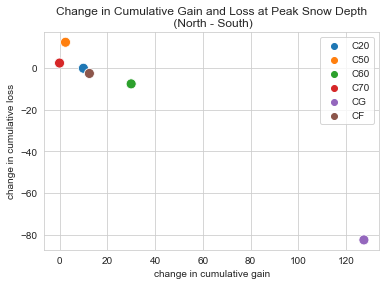

In [135]:
# Now, I want to create a scatter plot with the delta gain and delta loss values, with gain on the x-axis and loss on the y-axis.

fig = plt.plot(figsize=(12, 12))

# plt.scatter(df_delta['gain_peak_delta'], df_delta['loss_peak_delta'], hue = df_delta['site'], label='peak snow depth')

sns.scatterplot(data=df_delta, x='gain_peak_delta', y='loss_peak_delta', hue='site', s=100)

plt.xlabel('change in cumulative gain')
plt.ylabel('change in cumulative loss')
plt.title('Change in Cumulative Gain and Loss at Peak Snow Depth\n (North - South)')

plt.legend()

plt.show()


## Now, let's look at the gain and loss by the gap fraction

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_5896\3129241684.py:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(smn, cax = caxn, label = "")
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_5896\3129241684.py:57: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')


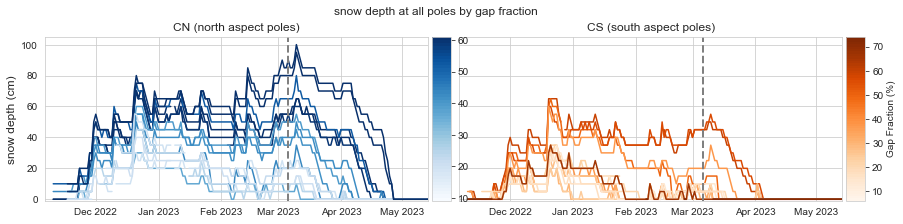

In [69]:
fig, ax = plt.subplots(1,2, figsize = (12,3), sharex=True, sharey=True, constrained_layout=True)

plt.suptitle("snow depth at all poles by gap fraction")

# NORTH _________________________________________________________________________________________________________________________
#The following code sets up the colorbar
dividern = make_axes_locatable(ax[0])
caxn = dividern.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CN23['SiteOpennessAdjusted'].max())-int(SDD_CN23['SiteOpennessAdjusted'].min())
cmapn = plt.get_cmap('Blues', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CN23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CN23['SiteOpennessAdjusted'].max()))
smn = plt.cm.ScalarMappable(cmap=cmapn, norm=norm)
smn.set_array([])
# plt.colorbar(smn, cax = caxn, label = "gap fraction (%)")
plt.colorbar(smn, cax = caxn, label = "")

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[0].plot(CN20['Date'], CN20['Pole1'], label = "CN-20-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole2'], label = "CN-20-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN20['Date'], CN20['Pole3'], label = "CN-20-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-20-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN50['Date'], CN50['Pole1'], label = "CN-50-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole2'], label = "CN-50-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN50['Date'], CN50['Pole3'], label = "CN-50-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-50-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN60['Date'], CN60['Pole1'], label = "CN-60-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole2'], label = "CN-60-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN60['Date'], CN60['Pole3'], label = "CN-60-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-60-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CN70['Date'], CN70['Pole1'], label = "CN-70-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole2'], label = "CN-70-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CN70['Date'], CN70['Pole3'], label = "CN-70-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-70-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNF23['Date'], CNF23['Pole1'], label = "CN-F-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole2'], label = "CN-F-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNF23['Date'], CNF23['Pole3'], label = "CN-F-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-F-pole3",'SiteOpennessAdjusted'])))

ax[0].plot(CNG23['Date'], CNG23['Pole1'], label = "CN-G-pole1", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole2'], label = "CN-G-pole2", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole2",'SiteOpennessAdjusted'])))
ax[0].plot(CNG23['Date'], CNG23['Pole3'], label = "CN-G-pole3", c=cmapn(int(SDD_CN23.loc[SDD_CN23['LocationID'] == "CN-G-pole3",'SiteOpennessAdjusted'])))

ax[0].set_ylim(-1,105)
ax[0].set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax[0].set_ylabel("snow depth (cm)", fontsize=12)
ax[0].set_title("CN (north aspect poles)")

# SOUTH _________________________________________________________________________________________________   
#The following code sets up the colorbar
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
N = int(SDD_CS23['SiteOpennessAdjusted'].max())-int(SDD_CS23['SiteOpennessAdjusted'].min())
cmap = plt.get_cmap('Oranges', N)
norm = mpl.colors.Normalize(vmin=int(SDD_CS23['SiteOpennessAdjusted'].min()), vmax=int(SDD_CS23['SiteOpennessAdjusted'].max()))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax = cax, label = 'Gap Fraction (%)')

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax[1].plot(CS20['Date'], CS20['Pole1'], label = "CS-20-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole2'], label = "CS-20-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS20['Date'], CS20['Pole3'], label = "CS-20-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS50['Date'], CS50['Pole1'], label = "CS-50-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole2'], label = "CS-50-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS50['Date'], CS50['Pole3'], label = "CS-50-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-50-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS60['Date'], CS60['Pole1'], label = "CS-60-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole2'], label = "CS-60-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS60['Date'], CS60['Pole3'], label = "CS-60-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-60-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CS120['Date'], CS120['Pole1'], label = "CS-120-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole2'], label = "CS-120-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CS120['Date'], CS120['Pole3'], label = "CS-120-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-120-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSF23['Date'], CSF23['Pole1'], label = "CS-F-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole2'], label = "CS-F-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole2",'SiteOpennessAdjusted'])))
ax[1].plot(CSF23['Date'], CSF23['Pole3'], label = "CS-F-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-F-pole3",'SiteOpennessAdjusted'])))

ax[1].plot(CSG23['Date'], CSG23['Pole1'], label = "CS-G-pole1", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole1",'SiteOpennessAdjusted'])))
ax[1].plot(CSG23['Date'], CSG23['Pole2'], label = "CS-G-pole2", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])))
#ax[1].plot(CSG23['Date'], CSG23['Pole3'], label = "CS-G-pole3", c=cmap(int(SDD_CS23.loc[SDD_CS23['LocationID'] == "CS-G-pole3",'SiteOpennessAdjusted'])))
# there is no site openness value for the above pole and therefore it is excluded from the plot

ax[1].set_ylim(-1,105)
ax[1].set_xlim([datetime.date(2022, 11, 6), datetime.date(2023, 5, 14)])
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%b %Y'))
# ax[1].set_ylabel("snow depth (cm), fontsize=12")
ax[1].set_title("CS (south aspect poles)")

# add lines for the lidar data flights
ax[0].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)
ax[1].axvline(x=datetime.date(2023, 3, 6), color='grey', linestyle='--', label="post-treatment lidar flight", linewidth=2)

# ax[0].legend(loc='upper left')
# ax[1].legend(loc='upper left')

# ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()